# Introduction

Covid-19 Pandemic has raised alarms over one of the most overlooked area to focus: Healthcare Management. While healthcare management has various use cases for using data science, patient length of stay is one critical parameter to observe and predict if one wants to improve the efficiency of the healthcare management in a hospital.

This parameter helps hospitals to identify patients of high LOS risk (patients who will stay longer) at the time of admission. Once identified, patients with high LOS risk can have their treatment plan optimized to miminize LOS and lower the chance of staff/visitor infection. Also, prior knowledge of LOS can aid in logistics such as room and bed allocation planning.

The goal of this project is to accurately predict the Length of Stay for each patient on case by case basis so that the Hospitals can use this information for optimal resource allocation and better functioning.

# Import Required Dependencies

In [1]:
# Importing Dependencies
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10, 6)
import seaborn as sns
pd.set_option('display.max_columns',None) 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read files
df = pd.read_csv('HealthCareAnalytics.csv')
df

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


# Basic Checks

In [3]:
print('Shape of the DataFrame:',df.shape)

Shape of the DataFrame: (318438, 18)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [6]:
df.describe(include='O')

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


In [7]:
print('Datatype of Each Column: \n',df.dtypes)

Datatype of Each Column: 
 case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available_Extra_Rooms_in_Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed_Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type_of_Admission                     object
Severity_of_Illness                   object
Visitors_with_Patient                  int64
Age                                   object
Admission_Deposit                      int64
Stay                                  object
dtype: object


In [8]:
print('Duplicated Values: ',df.duplicated().sum())

Duplicated Values:  0


# Missing Values

In [9]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [10]:
# Pecentage of Missing Values for Each Column : 
features_with_na=[features for features in df.columns if df[features].isnull().sum()>0] # list having columns with missing value
print('The Features that have missing values are as follows: \n',features_with_na)
print('-'*125)
for feature in features_with_na:
    print('Percentage of missing values in {} Feature is {} %'.format(feature, np.round(df[feature].isnull().mean()*100, 2)))

The Features that have missing values are as follows: 
 ['Bed_Grade', 'City_Code_Patient']
-----------------------------------------------------------------------------------------------------------------------------
Percentage of missing values in Bed_Grade Feature is 0.04 %
Percentage of missing values in City_Code_Patient Feature is 1.42 %


> These are given as numerical variables but are actually categorical. So later on in the FE Section we convert into to object and impute them with mode.

# Target Variable

In [11]:
df.Stay.value_counts()

21-30                 87491
Nov-20                78139
31-40                 55159
51-60                 35018
0-10                  23604
41-50                 11743
71-80                 10254
More than 100 Days     6683
81-90                  4838
91-100                 2765
61-70                  2744
Name: Stay, dtype: int64

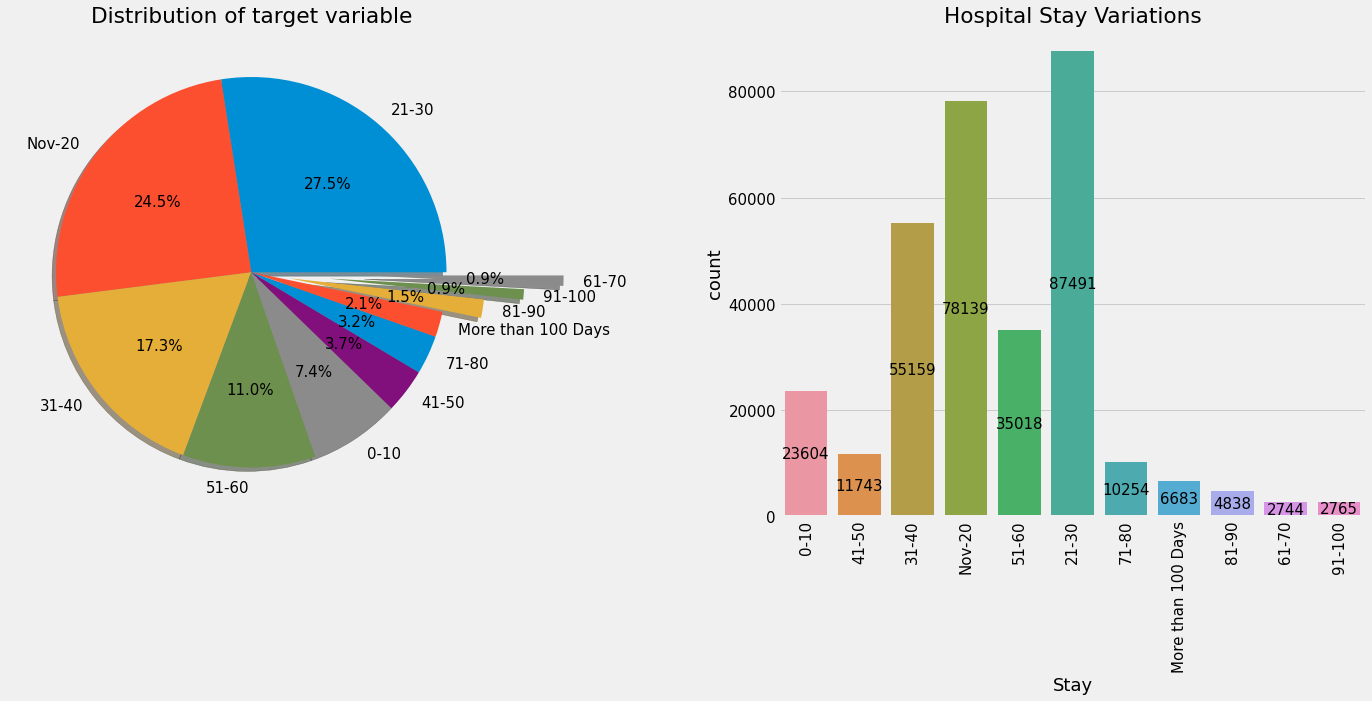

In [12]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df.Stay.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],explode=[0,0,0,0,0,0,0,0,0.2,0.4,0.6],shadow=True)
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')
sns.countplot('Stay',data=df,ax=ax[1])
annotations = ax[1].bar_label(ax[1].containers[0], fmt='%g',label_type='center')
ax[1].set_title('Hospital Stay Variations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

> It is an imbalanced type problem. There are too many target classes. We will reduce the number of classes in the target variable to simplify the problem.

In [13]:
# Replacing Target labels 
df["Stay"] = df.Stay.replace({"0-10" : 0, "Nov-20" : 0, "21-30" : 0, # Inside First month, also 'Nov-20' --> '11-20' 
                              "31-40" : 1, "41-50" : 1, "51-60" : 1, # 2 months
                              "61-70" : 2, "71-80" : 2, "81-90" : 2, # 3 months
                              "91-100" : 3 ,"More than 100 Days":3 # More than 3 months
                             }) 

In [14]:
df.Stay.value_counts()

0    189234
1    101920
2     17836
3      9448
Name: Stay, dtype: int64

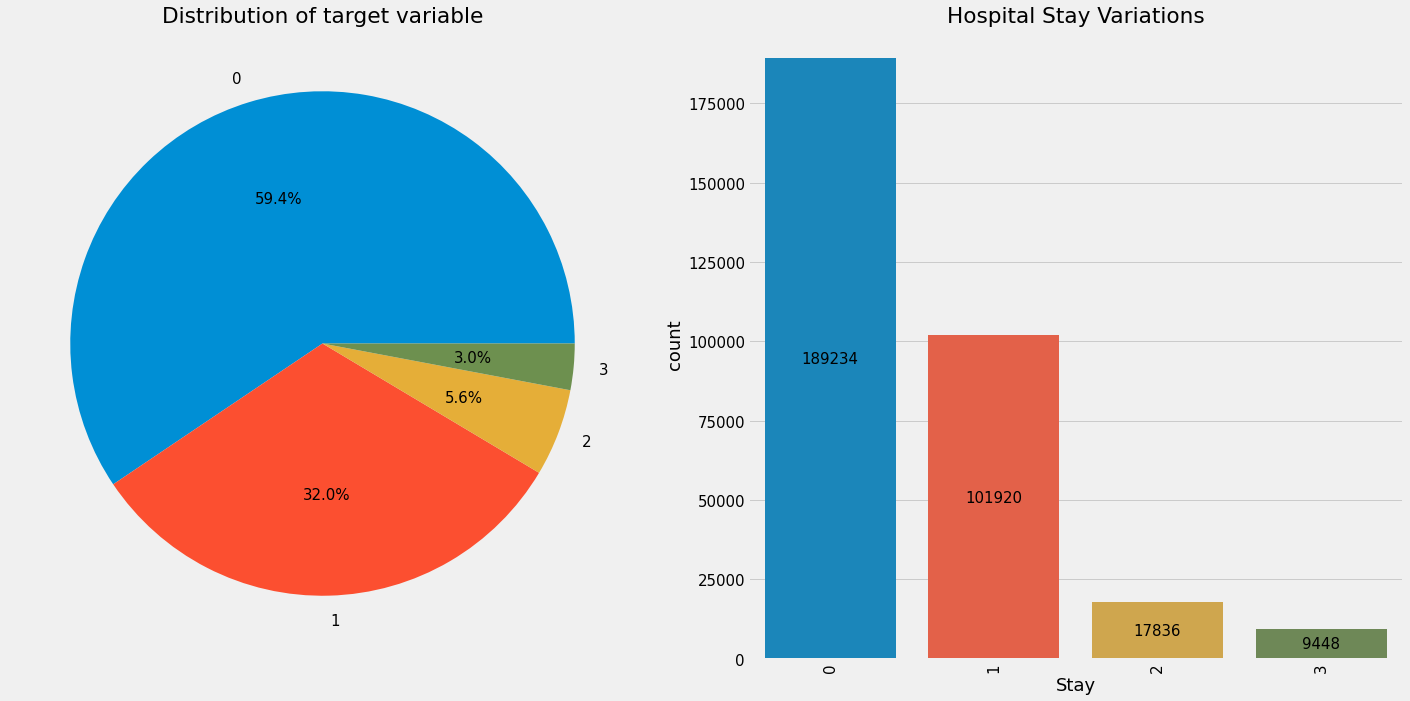

In [15]:
f,ax=plt.subplots(1,2,figsize=(20,10))
df.Stay.value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('Distribution of target variable')
ax[0].set_ylabel('')
sns.countplot('Stay',data=df,ax=ax[1])
annotations = ax[1].bar_label(ax[1].containers[0], fmt='%g',label_type='center')
ax[1].set_title('Hospital Stay Variations')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

> - Clearly There is higher percentage of people who stay for less than a month.
> - Surprising there are a lot of people who stay between the 1-2 month range.
> - Since there is imbalance it may affect model performance.

# Age

In [16]:
df["Age"] = df.Age.replace({"Nov-20" : "11-20"})

In [17]:
df.Age

0         51-60
1         51-60
2         51-60
3         51-60
4         51-60
          ...  
318433    41-50
318434    81-90
318435    71-80
318436    11-20
318437    11-20
Name: Age, Length: 318438, dtype: object

# Numerical Features

In [18]:
num_fe_unfiltered = [feature for feature in df.columns if df[feature].dtype!='O' and feature not in ['case_id','patientid','Stay']]
num_fe_unfiltered

['Hospital_code',
 'City_Code_Hospital',
 'Available_Extra_Rooms_in_Hospital',
 'Bed_Grade',
 'City_Code_Patient',
 'Visitors_with_Patient',
 'Admission_Deposit']

In [19]:
# Some Numerical features are actually Categorical
remove_cols = ['Hospital_code','City_Code_Hospital','Bed_Grade','City_Code_Patient']

In [20]:
num_fe = [feature for feature in num_fe_unfiltered if feature not in remove_cols]
num_fe

['Available_Extra_Rooms_in_Hospital',
 'Visitors_with_Patient',
 'Admission_Deposit']

# Discrete Features

In [21]:
dis_fe = ['Available_Extra_Rooms_in_Hospital','Visitors_with_Patient']

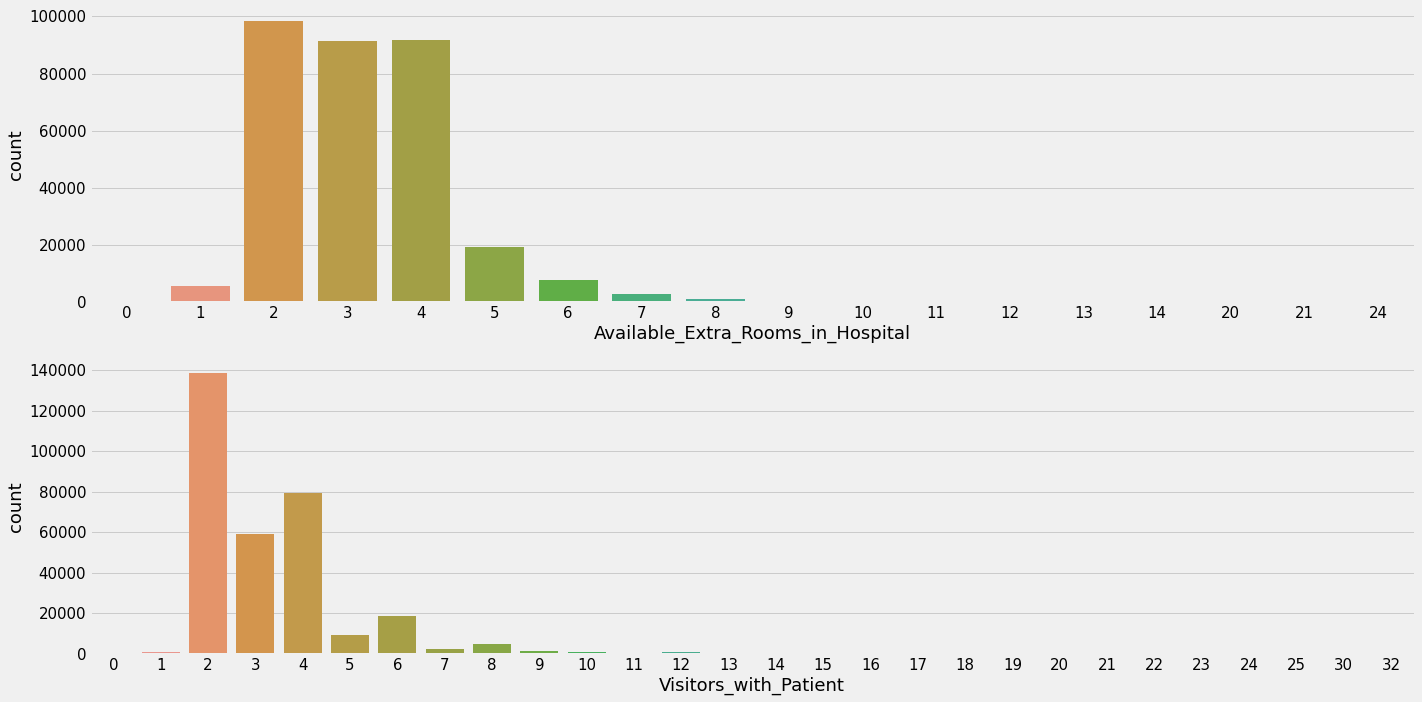

In [22]:
# Univariate Analysis
plt.figure(figsize=(20,10))
plotnum=1
for feature in dis_fe:
    if(plotnum<=2):
        ax=plt.subplot(2,1,plotnum) 
        sns.countplot(df[feature])
    plotnum+=1
plt.tight_layout() 

> -  Most of the Hospitals had only 2-4 Available extra rooms.
> -  Most of the times the number of vistors with patient were only 2 persons.

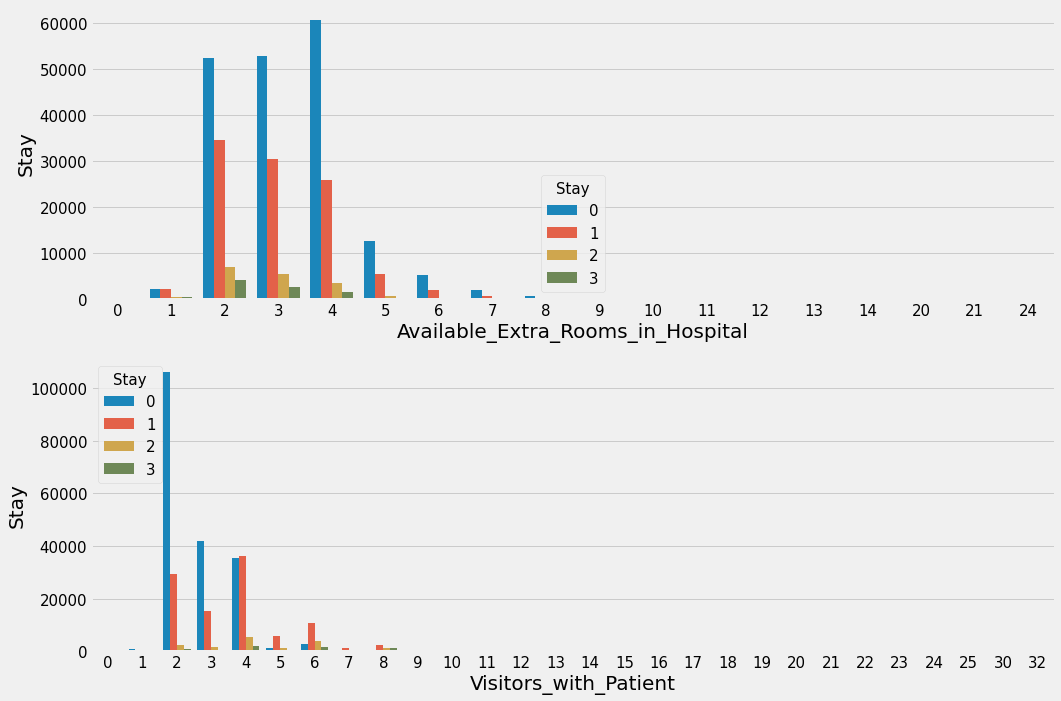

In [23]:
# Bivariate Analysis : 

plt.figure(figsize=(15,10))
plotnum = 1

for feature in dis_fe:
    if plotnum<=2 :
        ax = plt.subplot(2,1,plotnum)
        sns.countplot(x=df[feature],hue=df.Stay)
        plt.xlabel(feature,fontsize=20)
        plt.ylabel('Stay',fontsize=20)
    plotnum+=1
plt.tight_layout()

> Stay was predominantly within 1 month irrespective of how many extra rooms were there or how many visited along with patient expect for vistors with patient is 4 where it shows the patient stays more than a month.

# Continous Features

In [24]:
conti_fe = ['Admission_Deposit']

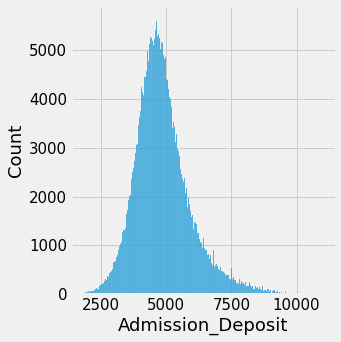

In [25]:
# Univariate Analysis
sns.displot(df.Admission_Deposit)

> Most of the initial amount deposit was around 4000-5000 Rs.

<AxesSubplot:xlabel='Admission_Deposit', ylabel='Density'>

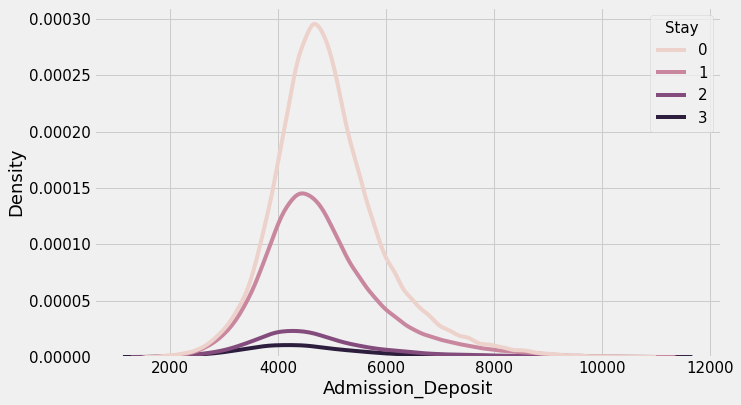

In [26]:
# Bivariate Analysis
sns.kdeplot(df.Admission_Deposit,hue=df.Stay)

> It seems like initial amount deposit is usually high no matter how long a person might stay.

# Categorical Features

In [27]:
cat_fe = [feature for feature in df.columns if df[feature].dtype == 'O'] 
cat_fe

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type_of_Admission',
 'Severity_of_Illness',
 'Age']

# Number of Unique Categories in each Feature

In [28]:
for feature in cat_fe:
    print('The no. of unique categories in {} feature is : {}'.format(feature,df[feature].nunique()))

The no. of unique categories in Hospital_type_code feature is : 7
The no. of unique categories in Hospital_region_code feature is : 3
The no. of unique categories in Department feature is : 5
The no. of unique categories in Ward_Type feature is : 6
The no. of unique categories in Ward_Facility_Code feature is : 6
The no. of unique categories in Type_of_Admission feature is : 3
The no. of unique categories in Severity_of_Illness feature is : 3
The no. of unique categories in Age feature is : 10


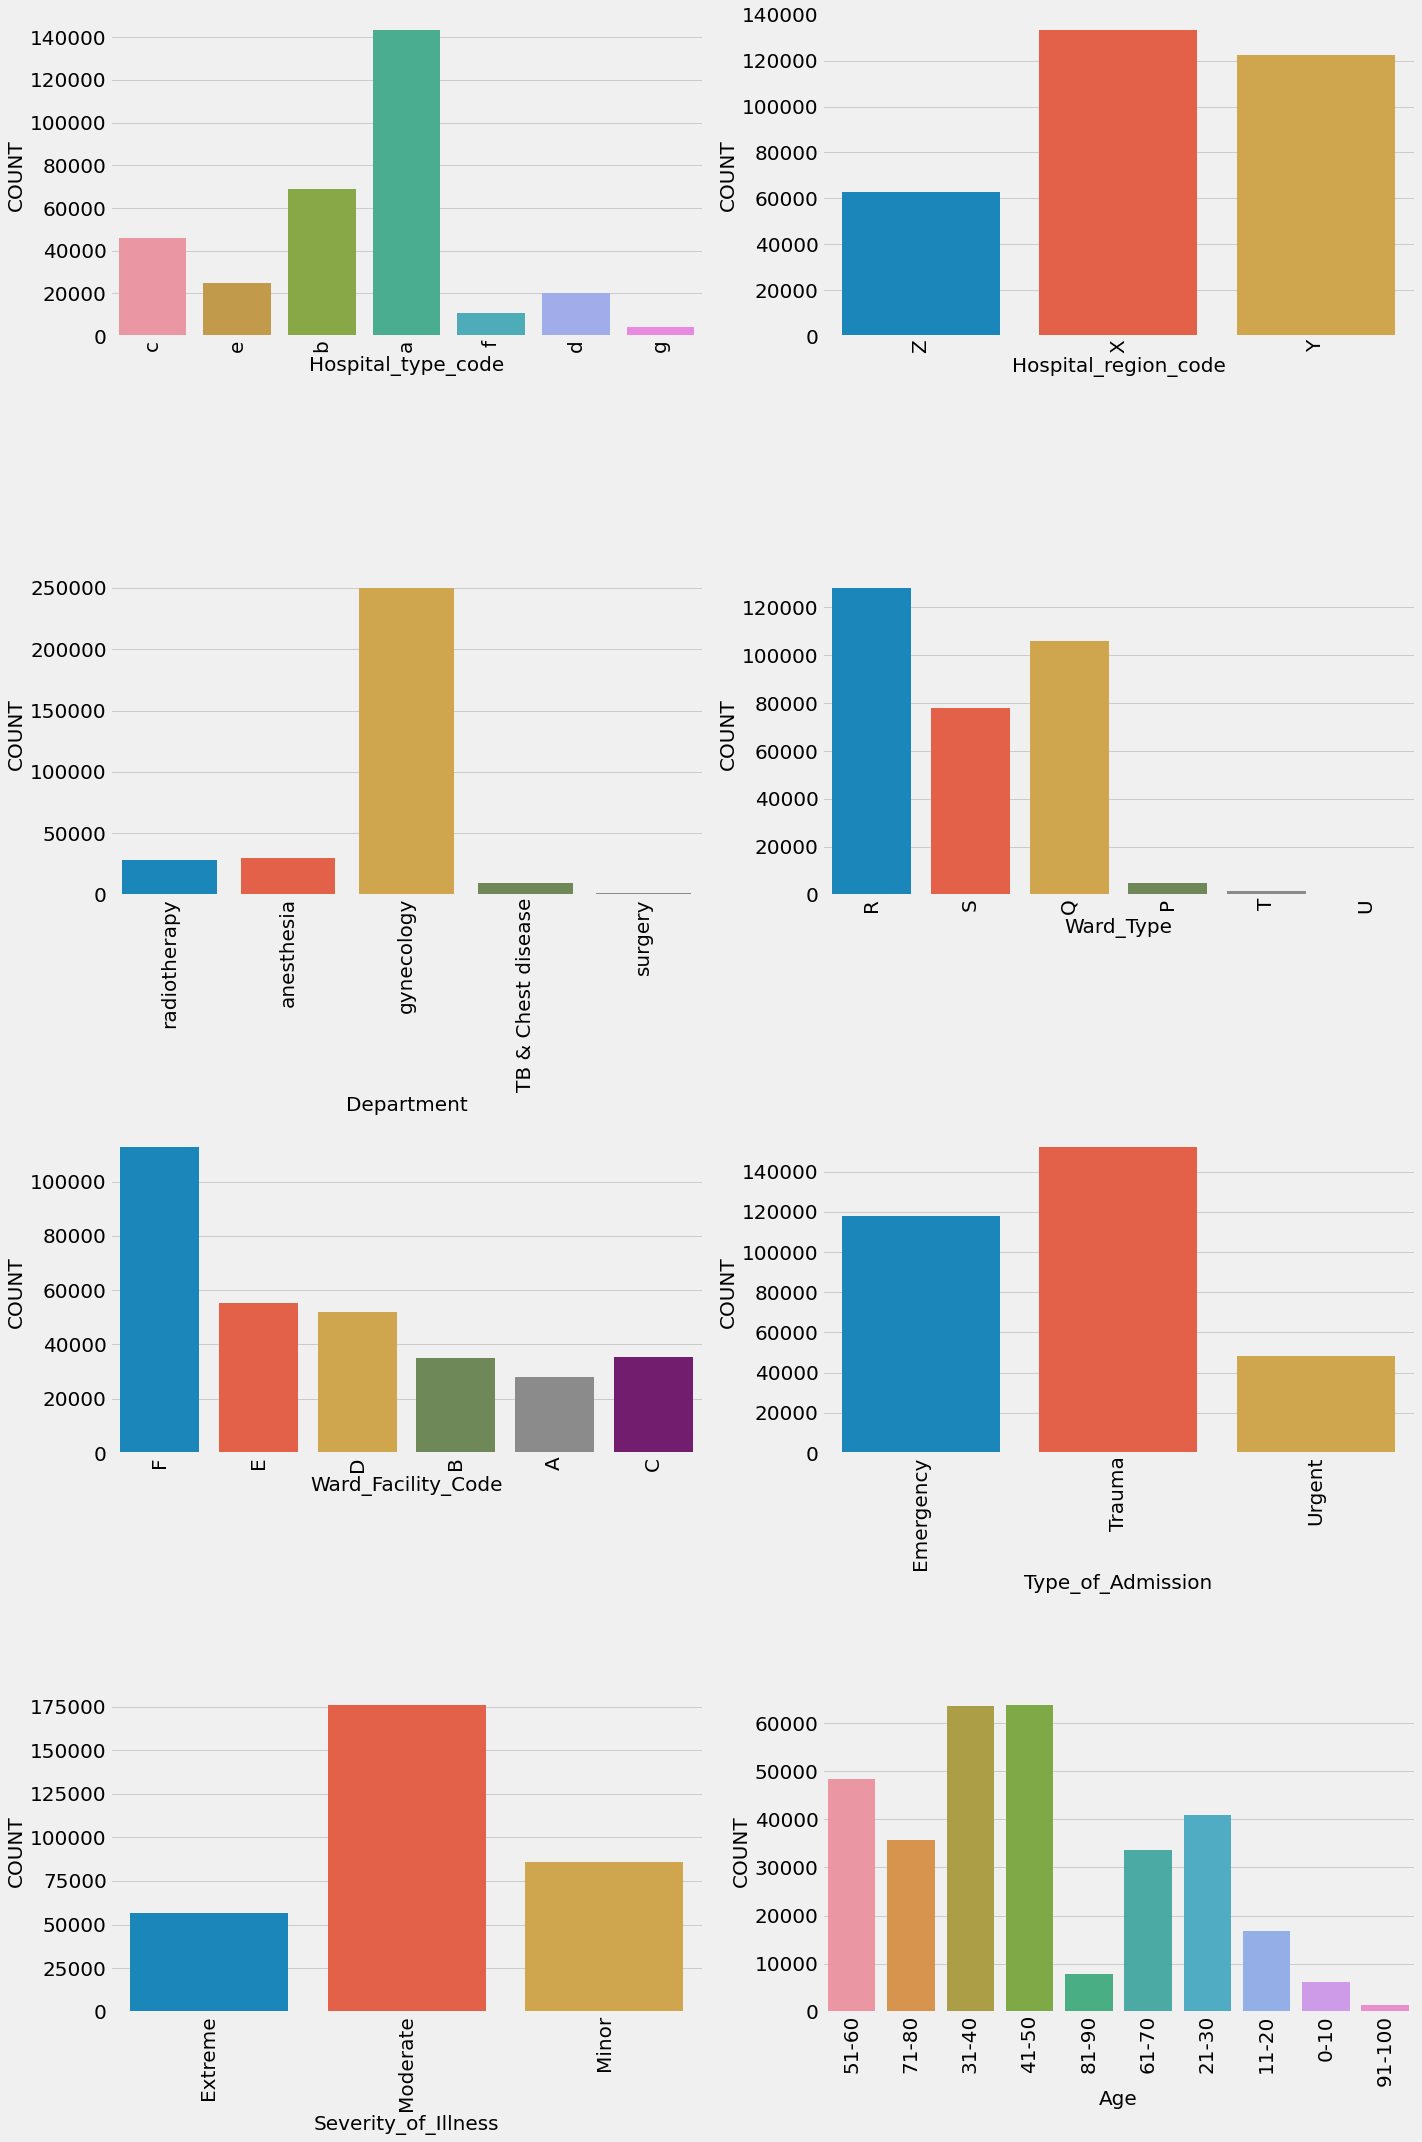

In [29]:
# Univariate Analysis

plt.figure(figsize=(20,30))
plotnum=1
for feature in cat_fe:
    if(plotnum<=len(cat_fe)): 
        ax=plt.subplot(4,2,plotnum) 
        sns.countplot(df[feature])
        plt.xlabel(feature,fontsize=20) 
        plt.ylabel('COUNT',fontsize=20)
        plt.xticks(fontsize=20,rotation=90)
        plt.yticks(fontsize=20)
    plotnum+=1
plt.tight_layout()  

> - Hospital_Type a seems to be the most common one with Hospital_Type g being the least common. 
> - Most of the cases belong to hospitals in region X followed by hospitals in region Y with least numbers from Z region.
> - Majority of the cases are in Gynecology department followed by Anesthesia and Radiotherapy departments.
> - Surgery has least number of cases.
> - Majority of the cases are in R ward type followed by Q and S. U has the least number of cases.
> - Most of the cases are admitted in the state of Trauma followed by Emergency followed by Urgent admission type.
> - Majority of the people admitted show moderate severity with more than 10% cases showing extreme severity.
> - There are good proportion of people showing Minor severity.
> - There seems to be almost equal number of patients in the Age Group of 41-50 and 31-40 with majority of them from 41-50 group.
> - Very few patients in the age group of 91-100, followed by 0-10 group.

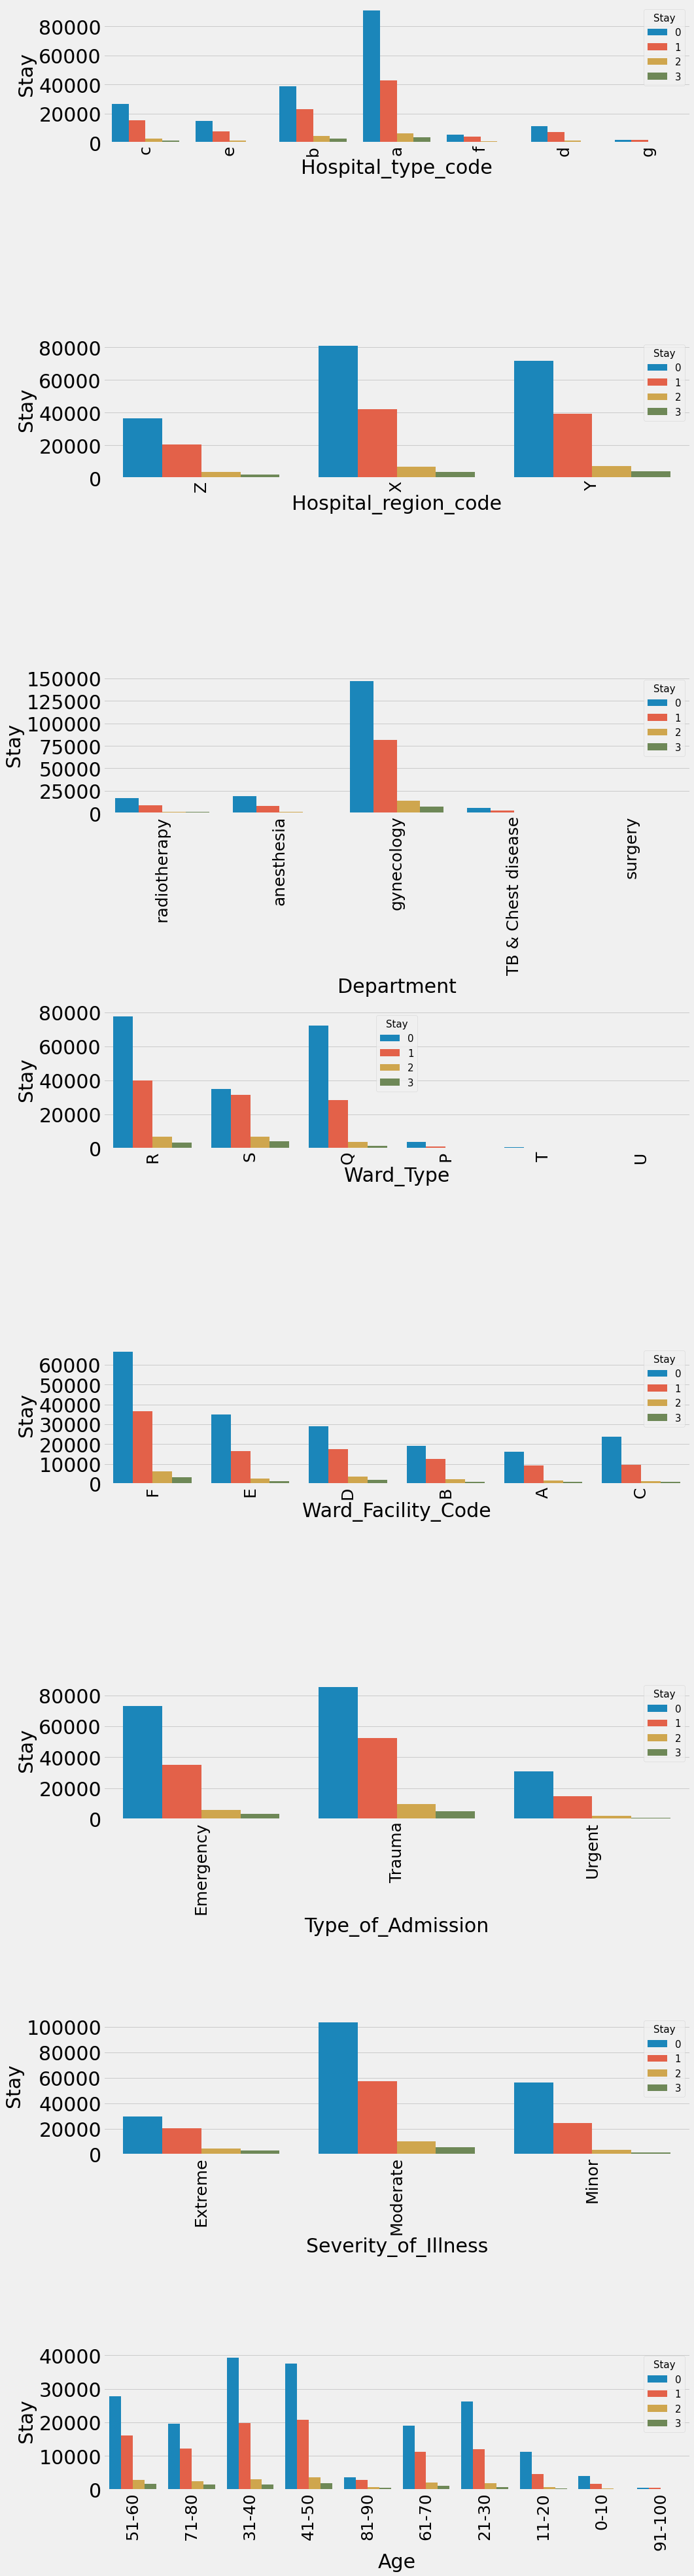

In [30]:
# Bivariate Analysis

plt.figure(figsize=(15,55))
plotnum = 1

for feature in cat_fe:
    if plotnum<=len(cat_fe):
        ax = plt.subplot(8,1,plotnum)
        sns.countplot(x=df[feature]
                        ,hue=df.Stay)
        plt.xlabel(feature,fontsize=30) 
        plt.ylabel('Stay',fontsize=30)
        plt.xticks(fontsize=25,rotation=90)
        plt.yticks(fontsize=30)
    plotnum+=1
plt.tight_layout()

> - We can see that most of the cases admitted to the Gynecology departments stay for a duration of less than 1 month.
> - All Admission type cases, most people stay for less than a month 
> - We can see that those who are admitted for less than 2 months also, have moderate severity which is not what we expect.
> - Majority of the patients admitted for more than 100 days are from the age group 41-50 closely followed by 51-60 and 71-80.
> - Age groups 31-40 and 41-50 form the majority of patients admitted for less than 1 month.
> - Quite a number of patients in the age group 41-50 also stay upto 2 months in the hospital.

# Analysis of a few Numerical Features which are actually Categorical

> <font color = 'chocolate'>So now the total number of categorical features becomes `9+4=13` </font>

In [31]:
for feature in remove_cols:
    print('The no. of unique categories in {} feature is : {}'.format(feature,df[feature].nunique()))

The no. of unique categories in Hospital_code feature is : 32
The no. of unique categories in City_Code_Hospital feature is : 11
The no. of unique categories in Bed_Grade feature is : 4
The no. of unique categories in City_Code_Patient feature is : 37


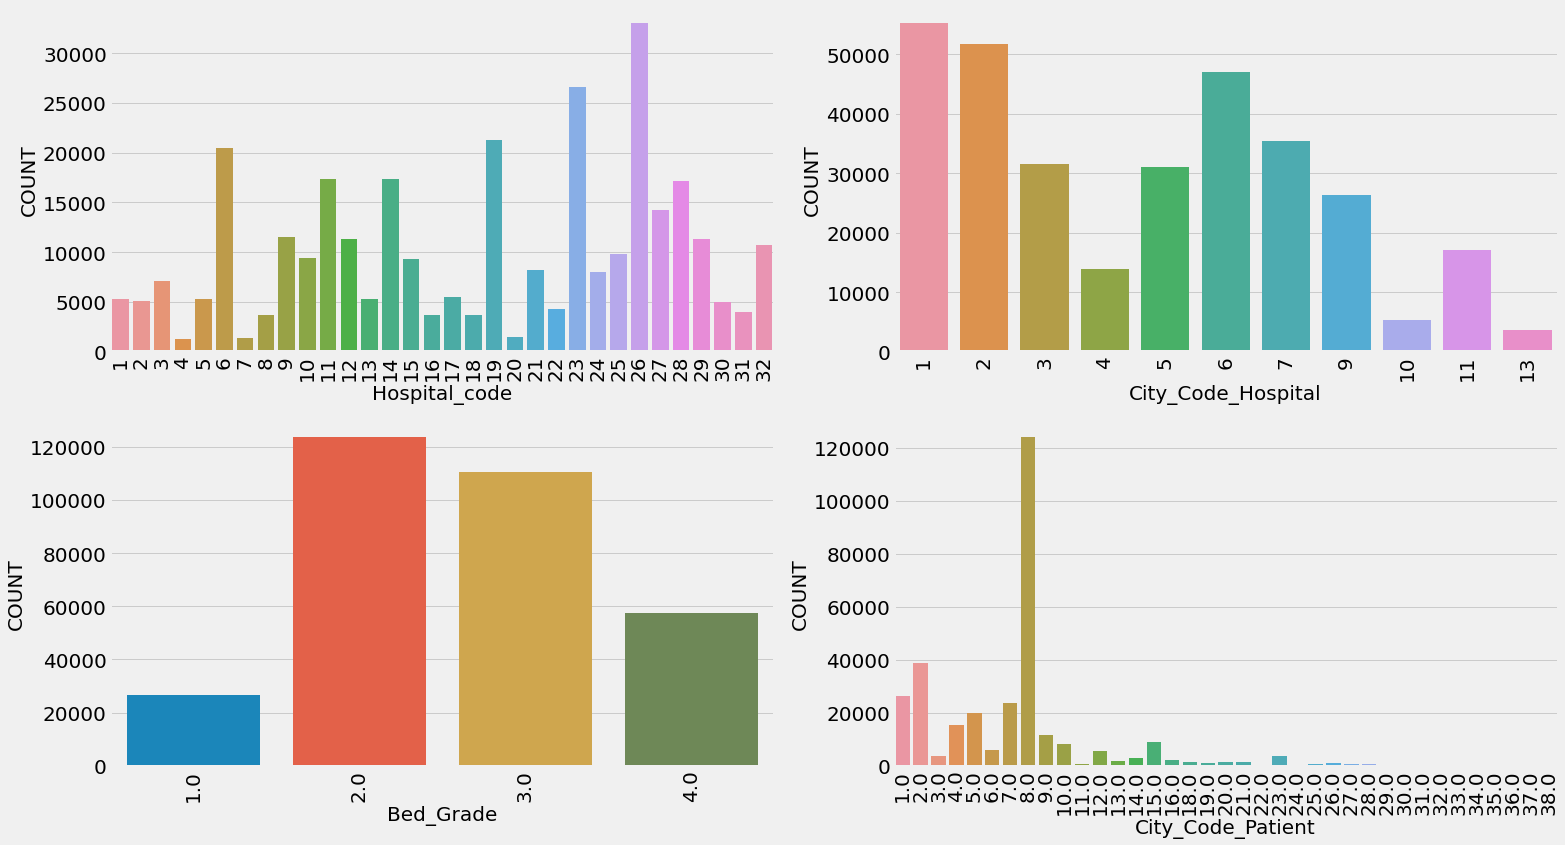

In [32]:
# Univariate Analysis

plt.figure(figsize=(22,12))
plotnum=1
for feature in remove_cols:
    if(plotnum<=len(remove_cols)): 
        ax=plt.subplot(2,2,plotnum) 
        sns.countplot(df[feature])
        plt.xlabel(feature,fontsize=20) 
        plt.ylabel('COUNT',fontsize=20)
        plt.xticks(fontsize=20,rotation=90)
        plt.yticks(fontsize=20)
    plotnum+=1
plt.tight_layout()  

> - We can see that almost 10% of the patients are admitted to the hospital with code 26 followed by hospital with code 23.
> - Hospital codes 4,7 and 20 constitute the least number of patients admitted.
> - Most of the cases are admitted to Bed Grade 2 and 3 with least number admitted to Bed Grade 1.

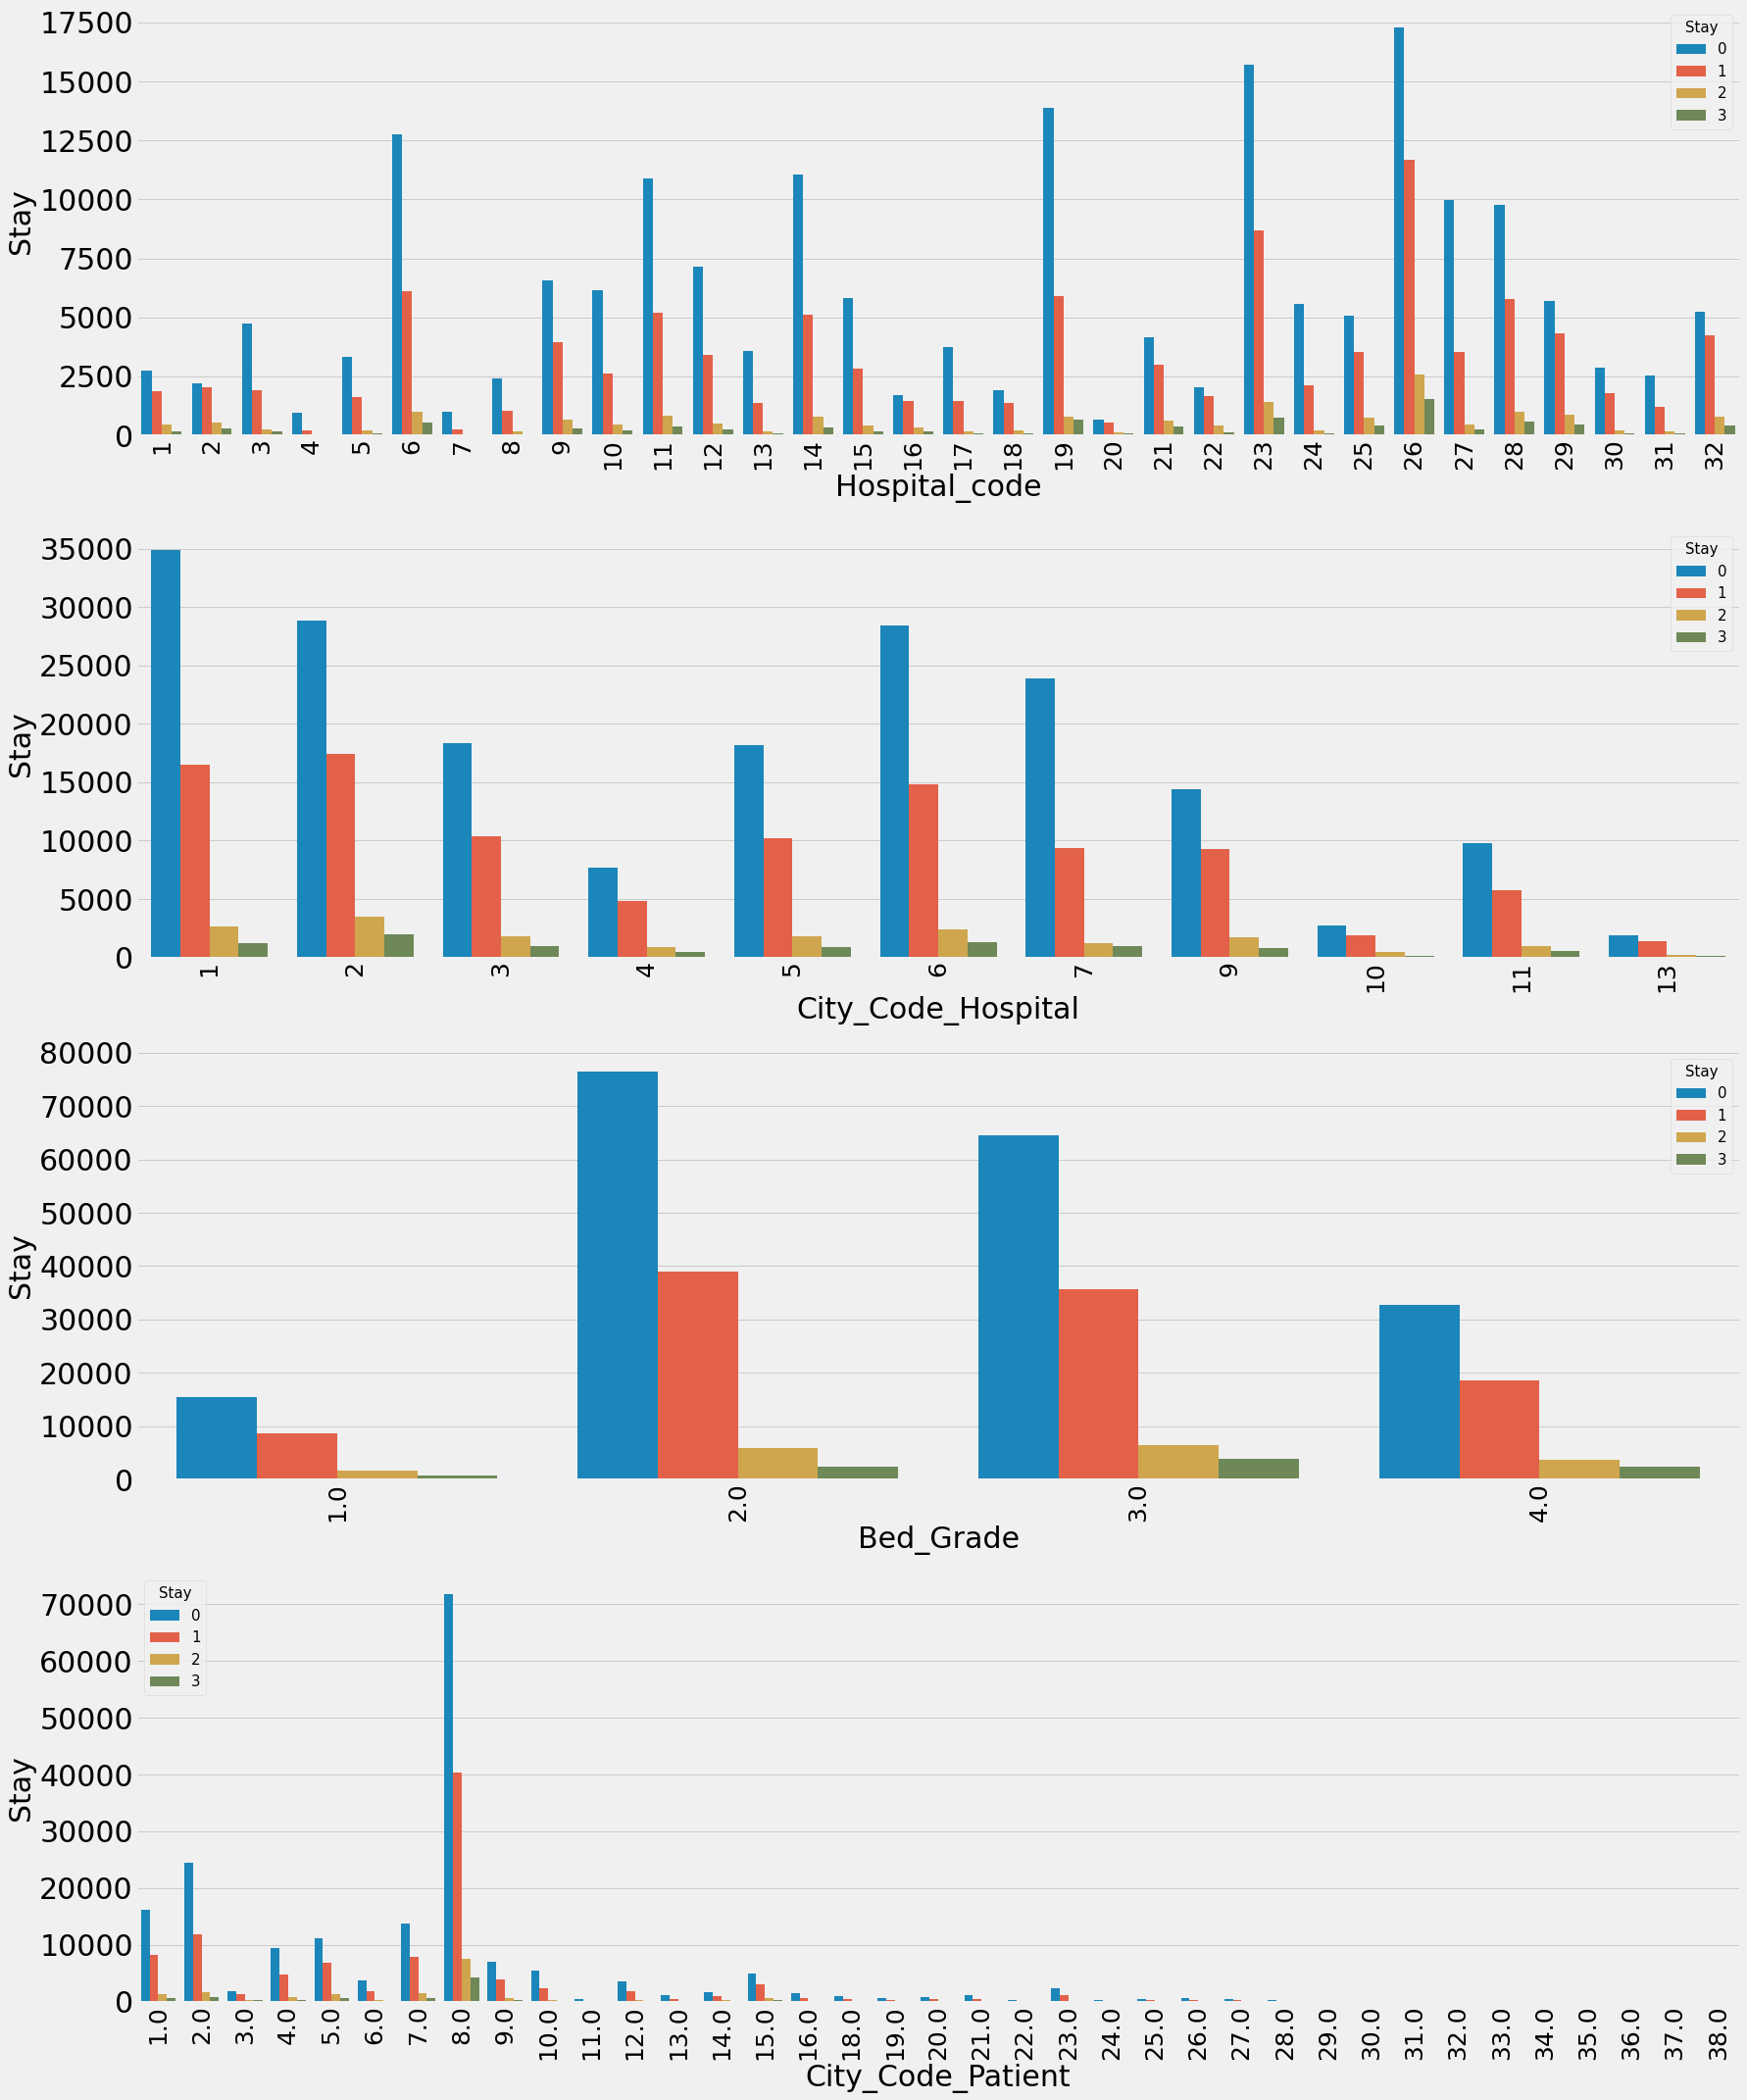

In [33]:
# Bivariate Analysis

plt.figure(figsize=(25,30))
plotnum = 1

for feature in remove_cols:
    if plotnum<=len(remove_cols):
        ax = plt.subplot(4,1,plotnum)
        sns.countplot(x=df[feature]
                        ,hue=df.Stay)
        plt.xlabel(feature,fontsize=30) 
        plt.ylabel('Stay',fontsize=30)
        plt.xticks(fontsize=25,rotation=90)
        plt.yticks(fontsize=30)
    plotnum+=1
plt.tight_layout()

> Most of the case admitted to bed grade 2 and 3, their length of stay in the hospital varies around the 1 month mark.

# Skewness and Kurtosis

In [34]:
for feature in num_fe:
    print('{:15}'.format(feature), # Align left Padding is given
          'Skewness: {:05.2f}'.format(df[feature].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(df[feature].kurt())  
         )

Available_Extra_Rooms_in_Hospital Skewness: 00.97     Kurtosis: 002.76
Visitors_with_Patient Skewness: 03.14     Kurtosis: 020.23
Admission_Deposit Skewness: 00.93     Kurtosis: 001.86


> We will take care of skewness using transformations in the FE Section.

# Outliers

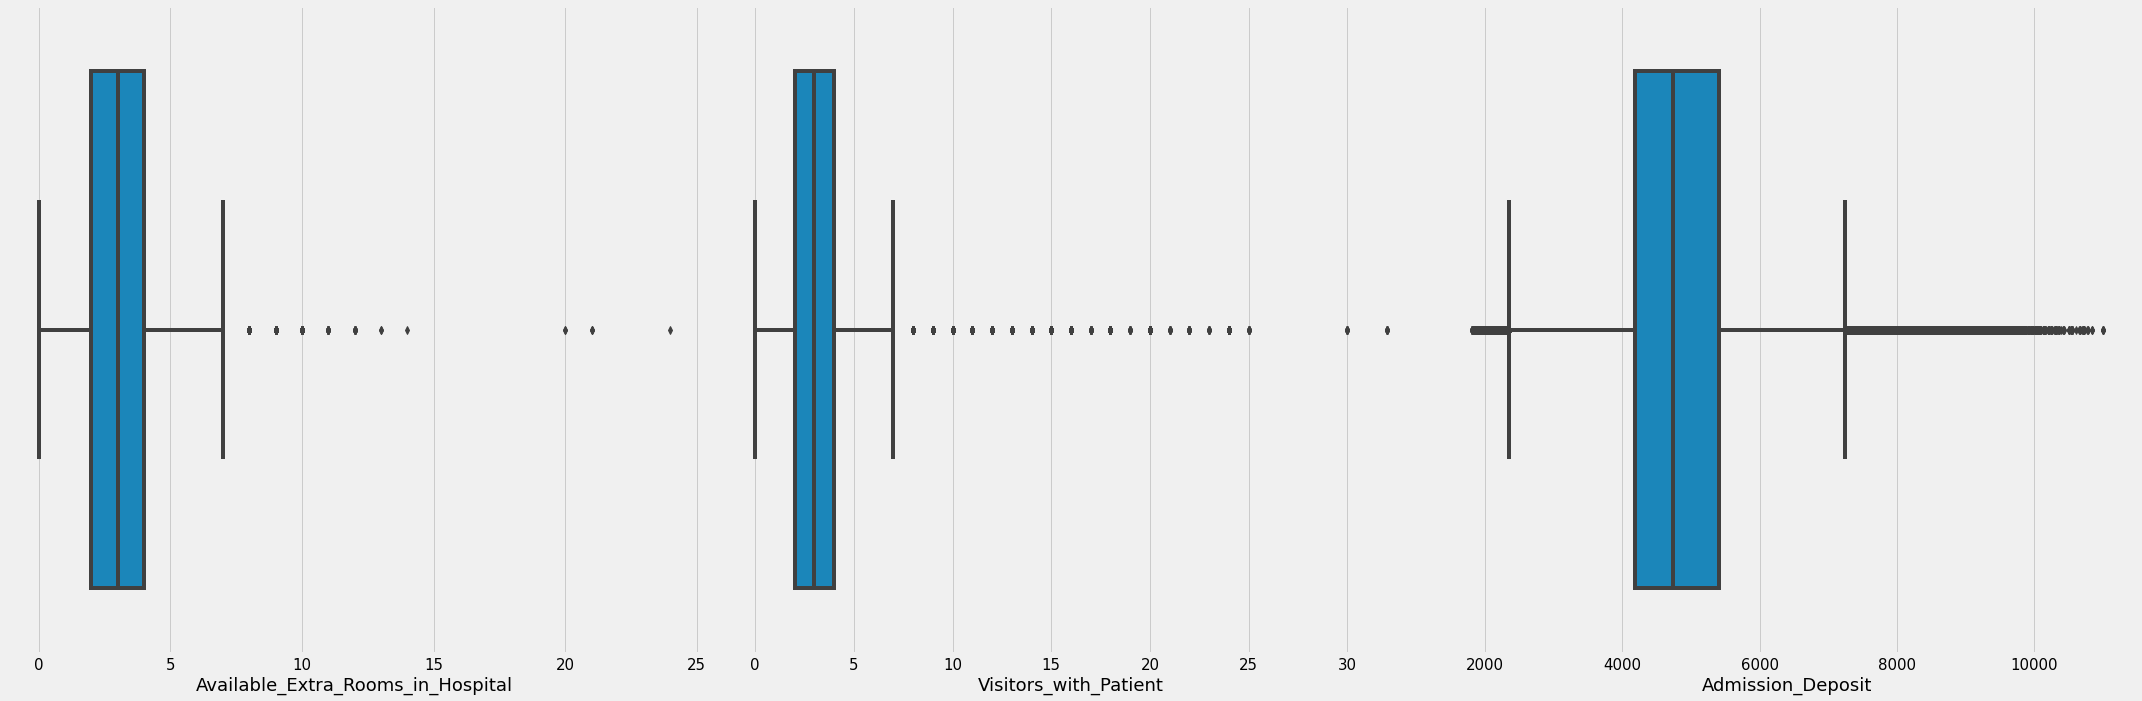

In [35]:
plt.figure(figsize=(30,10))
plotnum=1
for feature in num_fe:
    if(plotnum<=3):
        ax=plt.subplot(1,3,plotnum) 
        sns.boxplot(df[feature])
    plotnum+=1
plt.tight_layout()  

> There are outliers present. We will deal with them in the FE Section.

# Heatmap

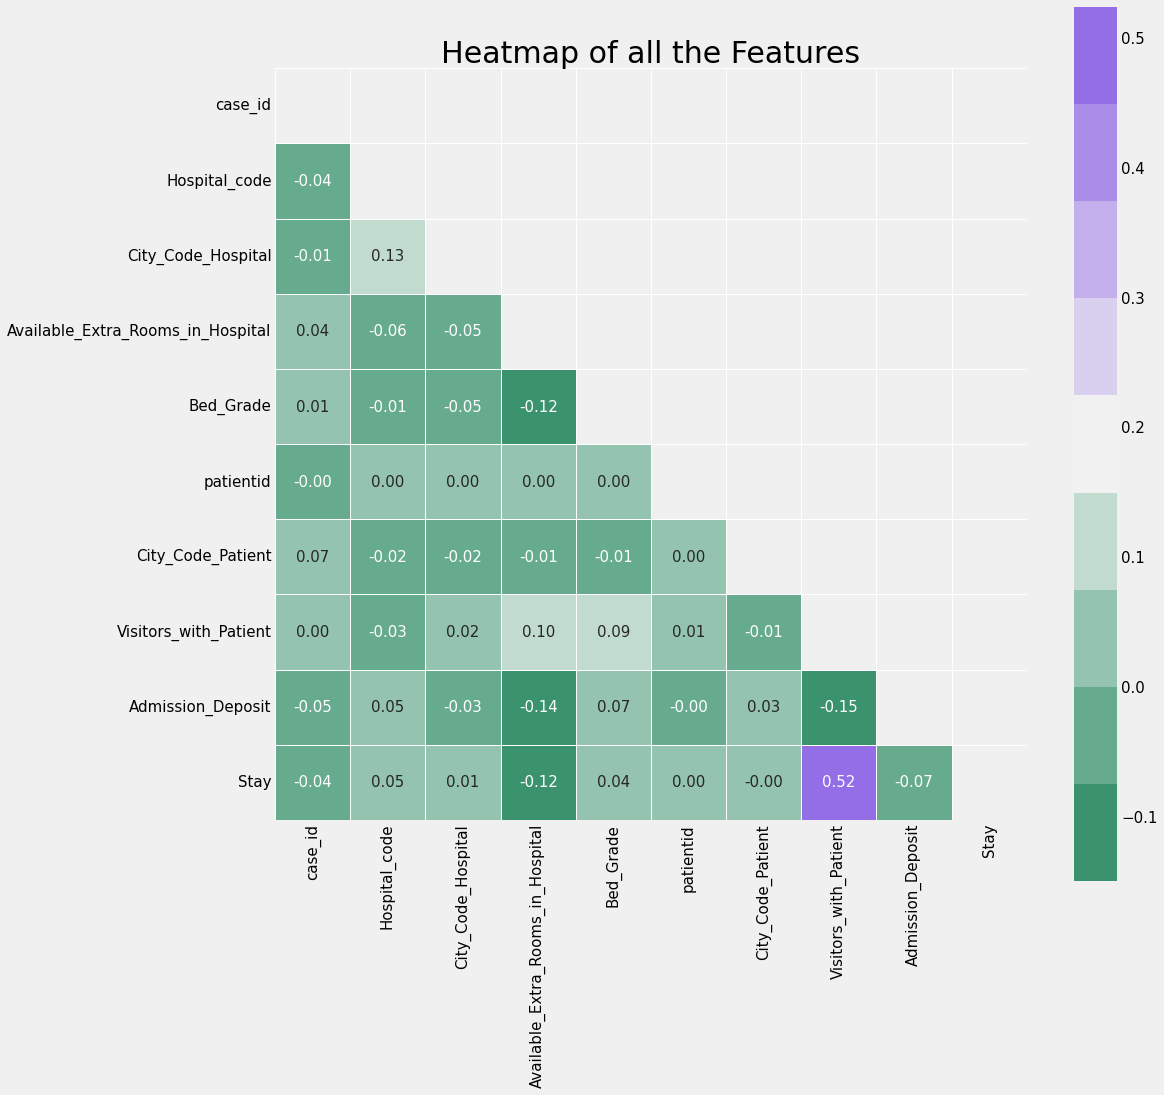

In [36]:
## Plotting heatmap. 
plt.subplots(figsize = (15,15))

# creating mask
mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(df.corr(), 
            cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9), 
            mask = mask, 
            annot=True, 
            square=True, linewidths=.5, fmt='.2f',annot_kws={'size': 15}
           );

plt.title("Heatmap of all the Features", fontsize = 30);

# Correlation with Target Variable

In [37]:
df_corr = df.corr()['Stay'].sort_values(ascending=False)

print('Most Positive Correlations:\n', df_corr.head(5))
print('\nMost Negative Correlations:\n', df_corr.tail(4).sort_values(ascending=True))

Most Positive Correlations:
 Stay                     1.000000
Visitors_with_Patient    0.523886
Hospital_code            0.045712
Bed_Grade                0.044238
City_Code_Hospital       0.009030
Name: Stay, dtype: float64

Most Negative Correlations:
 Available_Extra_Rooms_in_Hospital   -0.124407
Admission_Deposit                   -0.069138
case_id                             -0.038493
City_Code_Patient                   -0.000114
Name: Stay, dtype: float64


> - Highest Correlated Feature to the Target Variable is Vistors_with_Patient with the correlation being 0.52.
> - There is no Multicollinearity present in the dataset.
> - Correlation with the Target Variable is not very high for other features. Also there is imbalance, these two might be a
problem when it comes to model performance.

# Feature Engineering

# Outliers

In [38]:
df.loc[(df.Visitors_with_Patient>25),'Visitors_with_Patient']=np.median(df.Visitors_with_Patient)
df.loc[(df.Available_Extra_Rooms_in_Hospital>15),'Available_Extra_Rooms_in_Hospital']=np.median(df.Available_Extra_Rooms_in_Hospital)

# Log Transformation

In [39]:
# We will do Log transform of the skewed numerical features to lessen impact of outliers
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
from scipy.stats import skew
skewness = df[num_fe].apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
print(skewness)

3 skewed numerical features to log transform
Available_Extra_Rooms_in_Hospital    0.909140
Visitors_with_Patient                2.981952
Admission_Deposit                    0.931450
dtype: float64


In [40]:
skewed_features = skewness.index
df[skewed_features] = np.log1p(df[skewed_features])

In [41]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,1.386294,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,1.098612,51-60,8.499436,0
1,2,2,c,5,Z,1.098612,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,1.098612,51-60,8.691986,1
2,3,10,e,1,X,1.098612,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,1.098612,51-60,8.465057,1
3,4,26,b,2,Y,1.098612,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,1.098612,51-60,8.891924,1
4,5,26,b,2,Y,1.098612,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,1.098612,51-60,8.623174,1


# Converting Some Numerical Features to Categorical

In [42]:
remove_cols

['Hospital_code', 'City_Code_Hospital', 'Bed_Grade', 'City_Code_Patient']

In [43]:
df['Hospital_code'] = df['Hospital_code'].astype(str)

In [44]:
df['City_Code_Hospital'] = df['City_Code_Hospital'].astype(str)

In [45]:
df['Bed_Grade'] = df['Bed_Grade'].astype(str)

In [46]:
df['City_Code_Patient'] = df['City_Code_Patient'].astype(str)

# Missing Value Imputation

In [47]:
df['Bed_Grade'] = df['Bed_Grade'].fillna(df['Bed_Grade'].mode()[0]) 
df['City_Code_Patient'] = df['City_Code_Patient'].fillna(df['City_Code_Patient'].mode()[0])

In [48]:
df.isnull().sum().sum()

0

# Encoding

# Label Encoding

In [49]:
df = df.replace({"Bed_Grade" : {"1.0" : 1,"2.0" : 2,"3.0" : 3,"4.0" : 4},
                 "Type_of_Admission" : {"Trauma" : 0,"Urgent" : 1, "Emergency" : 2},
                 "Severity_of_Illness" : {"Minor" : 0, "Moderate" : 1, "Extreme" : 2}})

# One Hot Encoding

In [50]:
ohe_fe = [col for col in df.columns if df[col].dtype == 'O']
ohe_fe

['Hospital_code',
 'Hospital_type_code',
 'City_Code_Hospital',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Bed_Grade',
 'City_Code_Patient',
 'Age']

In [51]:
df = pd.get_dummies(df, columns= ohe_fe)

In [52]:
pd.set_option('display.max_rows',None) 

In [53]:
df.std() 

case_id                              91925.276847
Available_Extra_Rooms_in_Hospital        0.270698
patientid                            37979.936440
Type_of_Admission                        0.914274
Severity_of_Illness                      0.662886
Visitors_with_Patient                    0.327925
Admission_Deposit                        0.217031
Stay                                     0.734573
Hospital_code_1                          0.127326
Hospital_code_10                         0.169562
Hospital_code_11                         0.226836
Hospital_code_12                         0.184981
Hospital_code_13                         0.127171
Hospital_code_14                         0.226836
Hospital_code_15                         0.168003
Hospital_code_16                         0.106749
Hospital_code_17                         0.130294
Hospital_code_18                         0.106158
Hospital_code_19                         0.249389
Hospital_code_2                          0.125560


In [54]:
pd.reset_option('display.max_rows') 

In [55]:
df.duplicated().sum()

0

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Columns: 131 entries, case_id to Age_91-100
dtypes: float64(3), int64(5), uint8(123)
memory usage: 56.8 MB


# Train Test Split

In [57]:
X = df.drop(columns=['case_id','patientid','Stay'])
y = df.Stay

In [58]:
# Removing Unwanted Characters 
import re
X = X.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))   

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
# Standardizing numerical features
sc = StandardScaler()
X_train.loc[:, num_fe] = sc.fit_transform(X_train.loc[:, num_fe])
X_test.loc[:, num_fe] = sc.transform(X_test.loc[:, num_fe])

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254750 entries, 231676 to 121958
Columns: 128 entries, Available_Extra_Rooms_in_Hospital to Age_91100
dtypes: float64(3), int64(2), uint8(123)
memory usage: 41.5 MB


In [62]:
X_test.shape

(63688, 128)

# Feature Selection

In [63]:
from lightgbm import LGBMClassifier
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(X.shape[1])

# Create the model with several hyperparameters, we will be using light gbm model with boosting_type 'goss' because of its speed
model_for_fi = LGBMClassifier(objective='multiclass', num_classes =4 ,boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')

In [64]:
# Fit the model twice to avoid overfitting 
for i in range(2):
    
    # Split into training and validation set
    train_features, test_features, train_target, test_target = train_test_split(X_train, y_train, test_size = 0.2, random_state = i)
    scfi=StandardScaler()
    train_features.loc[:, num_fe] = scfi.fit_transform(train_features.loc[:, num_fe])
    test_features.loc[:, num_fe] = scfi.transform(test_features.loc[:, num_fe])
    
    
    # Train using early stopping
    model_for_fi.fit(train_features, train_target, early_stopping_rounds=100, eval_set = [(test_features, test_target)], 
              eval_metric = 'auc_mu', verbose = 200) 
    
    # Record the feature importances
    feature_importances += model_for_fi.feature_importances_

[200]	valid_0's auc_mu: 0.843793	valid_0's multi_logloss: 0.864765
[200]	valid_0's auc_mu: 0.841898	valid_0's multi_logloss: 0.868516


In [65]:
# Make sure to average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances.head()

,feature,importance
4,Admission_Deposit,4587.5
3,Visitors_with_Patient,2223.5
0,Available_Extra_Rooms_in_Hospital,1245.0
2,Severity_of_Illness,831.0
1,Type_of_Admission,809.5


In [66]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 15 features with 0.0 importance


,feature,importance
104,City_Code_Patient_320,0.0
106,City_Code_Patient_340,0.0
107,City_Code_Patient_350,0.0
108,City_Code_Patient_360,0.0
72,Ward_Facility_Code_D,0.0


In [67]:
def plot_feature_importances(df, threshold = 0.9):

    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

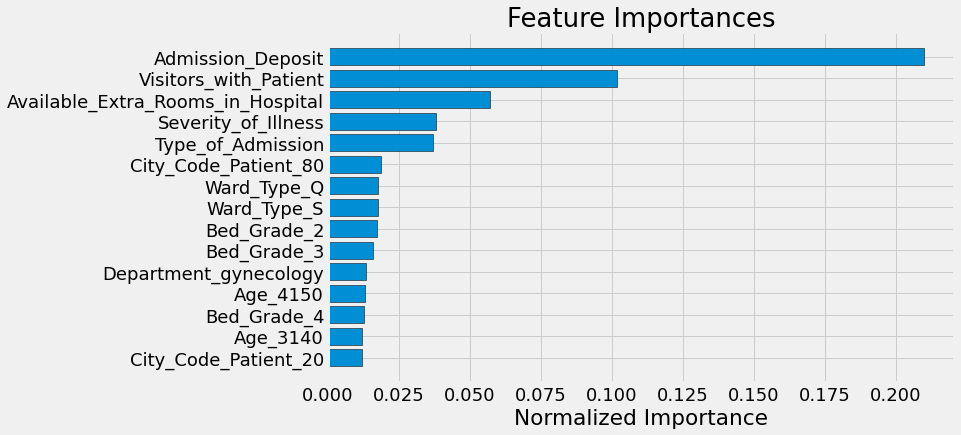

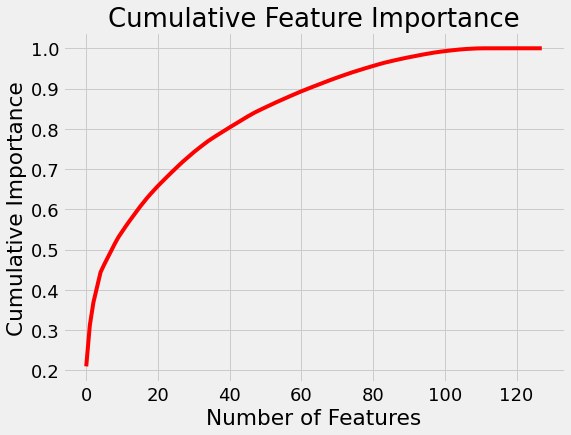

63 features required for 0.90 of cumulative importance


In [68]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [69]:
# We will drop only zero feature importance for now...
X_train=X_train.drop(columns = zero_features)
X_test=X_test.drop(columns = zero_features)

In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254750 entries, 231676 to 121958
Columns: 113 entries, Available_Extra_Rooms_in_Hospital to Age_91100
dtypes: float64(3), int64(2), uint8(108)
memory usage: 37.9 MB


In [71]:
X_test.shape

(63688, 113)

# Model Building and Evaluation

In [72]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB   
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve,roc_auc_score,confusion_matrix,f1_score,classification_report,accuracy_score
from bayes_opt import BayesianOptimization

In [73]:
base_models=['Logistic Regression','Random Forest Classifier','Gradient Boosting Classifier','Xgboost Classifier','Naive Bayes Classifier','LGBM Classifier','CatBoost Classifier']
f1_train=[]
auc_train=[]
f1_test=[]
auc_test=[]

## Evalation Metrics

In general, if you are working with an imbalanced dataset where all classes are equally important, using the macro average f1_score would be a good choice as it treats all classes equally.
If you have an imbalanced dataset but want to assign greater contribution to classes with more examples in the dataset, then the weighted average f1_score is preferred.

Our Business Case is to find the Length of Stay for each patient at the time of admission. So we want to predict the probabilities of LOS of patient and we use the model predict.proba method. The predictions represent a probability between 0 and 1. I will be using the f1_score and roc_auc_score as my evaluation metrics here to get the true measure of the model performance. Since I am showing f1 score for all classes considering all as equally important I will be using the macro average here but what I really want is the probability of LOS, so I am showing ROC AUC score for all classes (This will also be macro average). So here f1 score is just for showcasing but my main criterion is ROC AUC score moving forward.

## Logistic Regression

In [74]:
LR=LogisticRegression(multi_class='ovr')
LR.fit(X_train,y_train)
ytrain_pred=LR.predict(X_train)
ytest_pred=LR.predict(X_test)
ytrain_proba=LR.predict_proba(X_train) 
ytest_proba=LR.predict_proba(X_test)

## Evaluation

In [75]:
print("f1_score of train data considering all Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data considering all Classes: ", roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
print("f1_score of test data considering all Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data considering all Classes: ", roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

f1_score of train data considering all Classes:  0.36787046655111666
ROC AUC of train data considering all Classes:  0.8125258868168359
f1_score of test data considering all Classes:  0.36697836981333876
ROC AUC of test data considering all Classes:  0.8110272508566401


In [76]:
# Append Model Performace Scores to List
f1_train.append(f1_score(y_train,ytrain_pred,average='macro'))
auc_train.append(roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
f1_test.append(f1_score(y_test,ytest_pred,average='macro'))
auc_test.append(roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

## Random Forrest Classifier

In [77]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
ytrain_pred=rf.predict(X_train)
ytest_pred=rf.predict(X_test)
ytrain_proba=rf.predict_proba(X_train) 
ytest_proba=rf.predict_proba(X_test)

## Evaluation

In [78]:
print("f1_score of train data considering all Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data considering all Classes: ", roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
print("f1_score of test data considering all Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data considering all Classes: ", roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

f1_score of train data considering all Classes:  0.9998296467180813
ROC AUC of train data considering all Classes:  0.9999997785788559
f1_score of test data considering all Classes:  0.4944882703978228
ROC AUC of test data considering all Classes:  0.8182030682803678


In [79]:
# Append Model Performace Scores to List
f1_train.append(f1_score(y_train,ytrain_pred,average='macro'))
auc_train.append(roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
f1_test.append(f1_score(y_test,ytest_pred,average='macro'))
auc_test.append(roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

## Gradient Boosting Classifier

In [80]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
ytrain_pred=gbc.predict(X_train)
ytest_pred=gbc.predict(X_test)
ytrain_proba=gbc.predict_proba(X_train) 
ytest_proba=gbc.predict_proba(X_test)

## Evaluation

In [81]:
print("f1_score of train data considering all Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data considering all Classes: ", roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
print("f1_score of test data considering all Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data considering all Classes: ", roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

f1_score of train data considering all Classes:  0.4887868547318227
ROC AUC of train data considering all Classes:  0.834250994127698
f1_score of test data considering all Classes:  0.4832907619803566
ROC AUC of test data considering all Classes:  0.8313903243509482


In [82]:
# Append Model Performace Scores to List
f1_train.append(f1_score(y_train,ytrain_pred,average='macro'))
auc_train.append(roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
f1_test.append(f1_score(y_test,ytest_pred,average='macro'))
auc_test.append(roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

## Xgboost Classifier

In [83]:
xgc=XGBClassifier()
xgc.fit(X_train,y_train)
ytrain_pred=xgc.predict(X_train)
ytest_pred=xgc.predict(X_test)
ytrain_proba=xgc.predict_proba(X_train) 
ytest_proba=xgc.predict_proba(X_test)

## Evaluation

In [84]:
print("f1_score of train data considering all Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data considering all Classes: ", roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
print("f1_score of test data considering all Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data considering all Classes: ", roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

f1_score of train data considering all Classes:  0.5417909146886198
ROC AUC of train data considering all Classes:  0.869512530547792
f1_score of test data considering all Classes:  0.4993893787840867
ROC AUC of test data considering all Classes:  0.8447238394123275


In [85]:
# Append Model Performace Scores to List
f1_train.append(f1_score(y_train,ytrain_pred,average='macro'))
auc_train.append(roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
f1_test.append(f1_score(y_test,ytest_pred,average='macro'))
auc_test.append(roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

## Naive bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB() 
nb.fit(X_train,y_train)
ytrain_pred=nb.predict(X_train)
ytest_pred=nb.predict(X_test)
ytrain_proba=nb.predict_proba(X_train) 
ytest_proba=nb.predict_proba(X_test)

## Evaluation

In [87]:
print("f1_score of train data considering all Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data considering all Classes: ", roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
print("f1_score of test data considering all Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data considering all Classes: ", roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

f1_score of train data considering all Classes:  0.1753908366797582
ROC AUC of train data considering all Classes:  0.5996511743875594
f1_score of test data considering all Classes:  0.17465970730724734
ROC AUC of test data considering all Classes:  0.597376885429268


In [88]:
# Append Model Performace Scores to List
f1_train.append(f1_score(y_train,ytrain_pred,average='macro'))
auc_train.append(roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
f1_test.append(f1_score(y_test,ytest_pred,average='macro'))
auc_test.append(roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

## LightGBM Classifier

In [89]:
lgbm=LGBMClassifier()
lgbm.fit(X_train,y_train)
ytrain_pred=lgbm.predict(X_train)
ytest_pred=lgbm.predict(X_test)
ytrain_proba=lgbm.predict_proba(X_train) 
ytest_proba=lgbm.predict_proba(X_test)

## Evaluation

In [90]:
print("f1_score of train data considering all Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data considering all Classes: ", roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
print("f1_score of test data considering all Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data considering all Classes: ", roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

f1_score of train data considering all Classes:  0.5145227941400319
ROC AUC of train data considering all Classes:  0.8579664522150139
f1_score of test data considering all Classes:  0.4927668920682876
ROC AUC of test data considering all Classes:  0.8441976203707129


In [91]:
# Append Model Performace Scores to List
f1_train.append(f1_score(y_train,ytrain_pred,average='macro'))
auc_train.append(roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
f1_test.append(f1_score(y_test,ytest_pred,average='macro'))
auc_test.append(roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

## Catboost Classifier

In [92]:
cb=CatBoostClassifier()
cb.fit(X_train,y_train)
ytrain_pred=cb.predict(X_train)
ytest_pred=cb.predict(X_test)
ytrain_proba=cb.predict_proba(X_train) 
ytest_proba=cb.predict_proba(X_test)

Learning rate set to 0.104963
0:	learn: 1.2568908	total: 370ms	remaining: 6m 9s
1:	learn: 1.1621574	total: 505ms	remaining: 4m 11s
2:	learn: 1.0876988	total: 662ms	remaining: 3m 39s
3:	learn: 1.0301775	total: 826ms	remaining: 3m 25s
4:	learn: 0.9823251	total: 986ms	remaining: 3m 16s
5:	learn: 0.9431178	total: 1.14s	remaining: 3m 8s
6:	learn: 0.9108476	total: 1.3s	remaining: 3m 3s
7:	learn: 0.8832184	total: 1.44s	remaining: 2m 58s
8:	learn: 0.8600106	total: 1.58s	remaining: 2m 54s
9:	learn: 0.8404711	total: 1.74s	remaining: 2m 52s
10:	learn: 0.8234583	total: 1.89s	remaining: 2m 50s
11:	learn: 0.8088644	total: 2.04s	remaining: 2m 48s
12:	learn: 0.7962970	total: 2.2s	remaining: 2m 47s
13:	learn: 0.7842420	total: 2.34s	remaining: 2m 44s
14:	learn: 0.7745309	total: 2.48s	remaining: 2m 43s
15:	learn: 0.7662160	total: 2.62s	remaining: 2m 40s
16:	learn: 0.7585235	total: 2.78s	remaining: 2m 40s
17:	learn: 0.7516427	total: 2.92s	remaining: 2m 39s
18:	learn: 0.7457962	total: 3.07s	remaining: 2m 3

158:	learn: 0.6757329	total: 21.6s	remaining: 1m 54s
159:	learn: 0.6756466	total: 21.7s	remaining: 1m 54s
160:	learn: 0.6755337	total: 21.9s	remaining: 1m 53s
161:	learn: 0.6754368	total: 22s	remaining: 1m 53s
162:	learn: 0.6753233	total: 22.1s	remaining: 1m 53s
163:	learn: 0.6751990	total: 22.2s	remaining: 1m 53s
164:	learn: 0.6751142	total: 22.4s	remaining: 1m 53s
165:	learn: 0.6749942	total: 22.5s	remaining: 1m 53s
166:	learn: 0.6749289	total: 22.6s	remaining: 1m 52s
167:	learn: 0.6748408	total: 22.7s	remaining: 1m 52s
168:	learn: 0.6747526	total: 22.9s	remaining: 1m 52s
169:	learn: 0.6746596	total: 23s	remaining: 1m 52s
170:	learn: 0.6745125	total: 23.1s	remaining: 1m 52s
171:	learn: 0.6743831	total: 23.2s	remaining: 1m 51s
172:	learn: 0.6743227	total: 23.4s	remaining: 1m 51s
173:	learn: 0.6742534	total: 23.5s	remaining: 1m 51s
174:	learn: 0.6740717	total: 23.6s	remaining: 1m 51s
175:	learn: 0.6739444	total: 23.7s	remaining: 1m 51s
176:	learn: 0.6738434	total: 23.9s	remaining: 1m 5

314:	learn: 0.6640269	total: 41.5s	remaining: 1m 30s
315:	learn: 0.6639267	total: 41.6s	remaining: 1m 30s
316:	learn: 0.6637418	total: 41.8s	remaining: 1m 29s
317:	learn: 0.6636877	total: 41.9s	remaining: 1m 29s
318:	learn: 0.6636220	total: 42s	remaining: 1m 29s
319:	learn: 0.6635332	total: 42.2s	remaining: 1m 29s
320:	learn: 0.6634891	total: 42.3s	remaining: 1m 29s
321:	learn: 0.6634203	total: 42.4s	remaining: 1m 29s
322:	learn: 0.6633827	total: 42.6s	remaining: 1m 29s
323:	learn: 0.6633251	total: 42.7s	remaining: 1m 29s
324:	learn: 0.6632522	total: 42.8s	remaining: 1m 28s
325:	learn: 0.6631931	total: 42.9s	remaining: 1m 28s
326:	learn: 0.6631595	total: 43.1s	remaining: 1m 28s
327:	learn: 0.6630967	total: 43.2s	remaining: 1m 28s
328:	learn: 0.6630306	total: 43.4s	remaining: 1m 28s
329:	learn: 0.6629795	total: 43.5s	remaining: 1m 28s
330:	learn: 0.6628570	total: 43.6s	remaining: 1m 28s
331:	learn: 0.6628160	total: 43.7s	remaining: 1m 28s
332:	learn: 0.6627478	total: 43.9s	remaining: 1m

470:	learn: 0.6562537	total: 1m 1s	remaining: 1m 9s
471:	learn: 0.6562101	total: 1m 1s	remaining: 1m 9s
472:	learn: 0.6561636	total: 1m 2s	remaining: 1m 9s
473:	learn: 0.6561022	total: 1m 2s	remaining: 1m 9s
474:	learn: 0.6560593	total: 1m 2s	remaining: 1m 9s
475:	learn: 0.6560340	total: 1m 2s	remaining: 1m 8s
476:	learn: 0.6559620	total: 1m 2s	remaining: 1m 8s
477:	learn: 0.6559390	total: 1m 2s	remaining: 1m 8s
478:	learn: 0.6559260	total: 1m 2s	remaining: 1m 8s
479:	learn: 0.6558731	total: 1m 3s	remaining: 1m 8s
480:	learn: 0.6558389	total: 1m 3s	remaining: 1m 8s
481:	learn: 0.6557780	total: 1m 3s	remaining: 1m 8s
482:	learn: 0.6557390	total: 1m 3s	remaining: 1m 7s
483:	learn: 0.6556794	total: 1m 3s	remaining: 1m 7s
484:	learn: 0.6556284	total: 1m 3s	remaining: 1m 7s
485:	learn: 0.6555982	total: 1m 3s	remaining: 1m 7s
486:	learn: 0.6555608	total: 1m 4s	remaining: 1m 7s
487:	learn: 0.6555235	total: 1m 4s	remaining: 1m 7s
488:	learn: 0.6554541	total: 1m 4s	remaining: 1m 7s
489:	learn: 

628:	learn: 0.6499377	total: 1m 22s	remaining: 48.8s
629:	learn: 0.6498686	total: 1m 22s	remaining: 48.6s
630:	learn: 0.6498152	total: 1m 22s	remaining: 48.5s
631:	learn: 0.6497772	total: 1m 23s	remaining: 48.4s
632:	learn: 0.6497546	total: 1m 23s	remaining: 48.2s
633:	learn: 0.6497007	total: 1m 23s	remaining: 48.1s
634:	learn: 0.6496607	total: 1m 23s	remaining: 48s
635:	learn: 0.6496290	total: 1m 23s	remaining: 47.8s
636:	learn: 0.6495906	total: 1m 23s	remaining: 47.7s
637:	learn: 0.6495496	total: 1m 23s	remaining: 47.6s
638:	learn: 0.6495065	total: 1m 23s	remaining: 47.5s
639:	learn: 0.6494773	total: 1m 24s	remaining: 47.3s
640:	learn: 0.6494123	total: 1m 24s	remaining: 47.2s
641:	learn: 0.6493645	total: 1m 24s	remaining: 47.1s
642:	learn: 0.6493130	total: 1m 24s	remaining: 46.9s
643:	learn: 0.6492648	total: 1m 24s	remaining: 46.8s
644:	learn: 0.6492337	total: 1m 24s	remaining: 46.7s
645:	learn: 0.6491862	total: 1m 24s	remaining: 46.5s
646:	learn: 0.6491424	total: 1m 25s	remaining: 4

784:	learn: 0.6445282	total: 1m 42s	remaining: 28.1s
785:	learn: 0.6444907	total: 1m 42s	remaining: 27.9s
786:	learn: 0.6444470	total: 1m 42s	remaining: 27.8s
787:	learn: 0.6444174	total: 1m 42s	remaining: 27.7s
788:	learn: 0.6443627	total: 1m 43s	remaining: 27.6s
789:	learn: 0.6443291	total: 1m 43s	remaining: 27.4s
790:	learn: 0.6442876	total: 1m 43s	remaining: 27.3s
791:	learn: 0.6442473	total: 1m 43s	remaining: 27.2s
792:	learn: 0.6442150	total: 1m 43s	remaining: 27s
793:	learn: 0.6441921	total: 1m 43s	remaining: 26.9s
794:	learn: 0.6441590	total: 1m 43s	remaining: 26.8s
795:	learn: 0.6441188	total: 1m 43s	remaining: 26.6s
796:	learn: 0.6441014	total: 1m 44s	remaining: 26.5s
797:	learn: 0.6440610	total: 1m 44s	remaining: 26.4s
798:	learn: 0.6440263	total: 1m 44s	remaining: 26.2s
799:	learn: 0.6439829	total: 1m 44s	remaining: 26.1s
800:	learn: 0.6439366	total: 1m 44s	remaining: 26s
801:	learn: 0.6439023	total: 1m 44s	remaining: 25.8s
802:	learn: 0.6438649	total: 1m 44s	remaining: 25.

940:	learn: 0.6394838	total: 2m 2s	remaining: 7.67s
941:	learn: 0.6394464	total: 2m 2s	remaining: 7.54s
942:	learn: 0.6394148	total: 2m 2s	remaining: 7.41s
943:	learn: 0.6393997	total: 2m 2s	remaining: 7.28s
944:	learn: 0.6393719	total: 2m 2s	remaining: 7.15s
945:	learn: 0.6393446	total: 2m 3s	remaining: 7.02s
946:	learn: 0.6392945	total: 2m 3s	remaining: 6.89s
947:	learn: 0.6392651	total: 2m 3s	remaining: 6.76s
948:	learn: 0.6392488	total: 2m 3s	remaining: 6.63s
949:	learn: 0.6392072	total: 2m 3s	remaining: 6.5s
950:	learn: 0.6391849	total: 2m 3s	remaining: 6.37s
951:	learn: 0.6391592	total: 2m 3s	remaining: 6.24s
952:	learn: 0.6391456	total: 2m 3s	remaining: 6.11s
953:	learn: 0.6391262	total: 2m 4s	remaining: 5.98s
954:	learn: 0.6391053	total: 2m 4s	remaining: 5.85s
955:	learn: 0.6390610	total: 2m 4s	remaining: 5.72s
956:	learn: 0.6390156	total: 2m 4s	remaining: 5.59s
957:	learn: 0.6389862	total: 2m 4s	remaining: 5.46s
958:	learn: 0.6389527	total: 2m 4s	remaining: 5.33s
959:	learn: 0

## Evaluation

In [93]:
print("f1_score of train data considering all Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data considering all Classes: ", roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
print("f1_score of test data considering all Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data considering all Classes: ", roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

f1_score of train data considering all Classes:  0.5347774711552402
ROC AUC of train data considering all Classes:  0.8666955398366418
f1_score of test data considering all Classes:  0.49784485808380424
ROC AUC of test data considering all Classes:  0.8469920725332093


In [94]:
# Append Model Performace Scores to List
f1_train.append(f1_score(y_train,ytrain_pred,average='macro'))
auc_train.append(roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
f1_test.append(f1_score(y_test,ytest_pred,average='macro'))
auc_test.append(roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

# Model Performance Table

In [95]:
performace = pd.DataFrame(base_models, columns = ['Classifiers'])
performace['f1_score_TrainData'] = f1_train
performace['AUC_TrainData'] = auc_train
performace['f1_score_TestData'] = f1_test
performace['AUC_TestData'] = auc_test
performace

,Classifiers,f1_score_TrainData,AUC_TrainData,f1_score_TestData,AUC_TestData
0,Logistic Regression,0.367870,0.812526,0.366978,0.811027
1,Random Forest Classifier,0.999830,1.000000,0.494488,0.818203
2,Gradient Boosting Classifier,0.488787,0.834251,0.483291,0.831390
3,Xgboost Classifier,0.541791,0.869513,0.499389,0.844724
4,Naive Bayes Classifier,0.175391,0.599651,0.174660,0.597377
5,LGBM Classifier,0.514523,0.857966,0.492767,0.844198
6,CatBoost Classifier,0.534777,0.866696,0.497845,0.846992


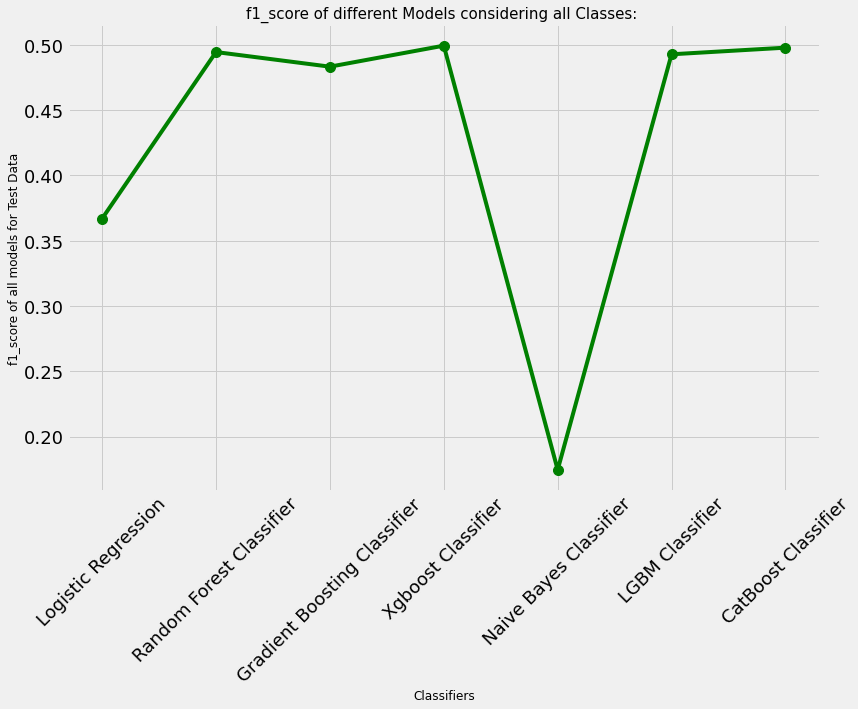

----------------------------------------------------------------------------------------------------


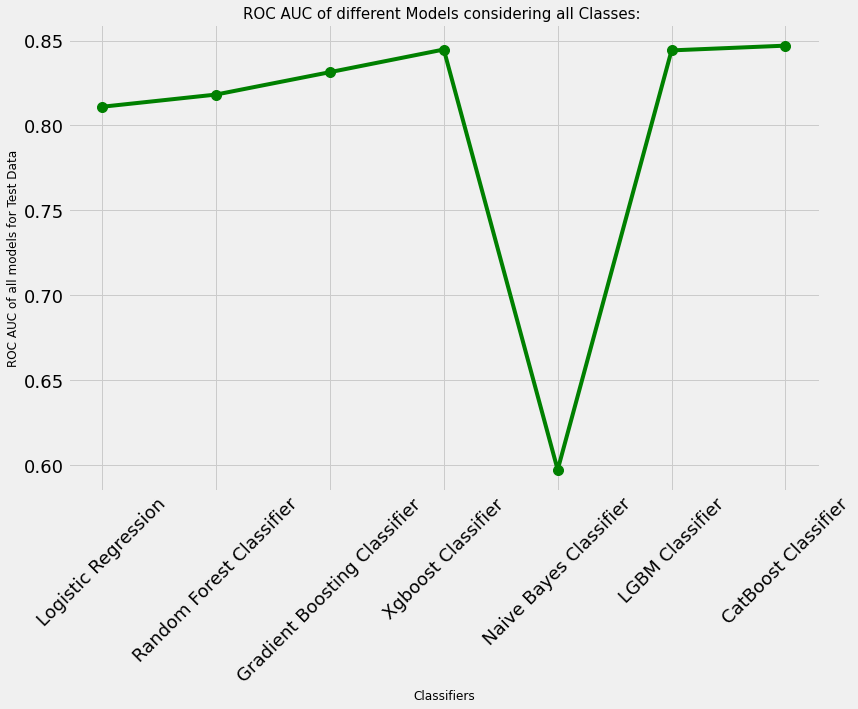

In [96]:
#Plot f1_score
plt.figure(figsize = (12,8))
plt.plot(performace['Classifiers'],performace['f1_score_TestData'],"go-",markersize=10)
plt.xlabel('Classifiers', fontsize = 12)
plt.ylabel('f1_score of all models for Test Data', fontsize = 12)
plt.xticks(rotation=45)
plt.title('f1_score of different Models considering all Classes: ',fontsize = 15)
plt.show()
print('-'*100)
#Plot AUC scores
plt.figure(figsize = (12,8))
plt.plot(performace['Classifiers'],performace['AUC_TestData'],"go-",markersize=10)
plt.xlabel('Classifiers', fontsize = 12)
plt.ylabel('ROC AUC of all models for Test Data', fontsize = 12)
plt.xticks(rotation=45)
plt.title('ROC AUC of different Models considering all Classes: ',fontsize = 15)
plt.show()

> - These ROC AUC values are for test data.
> - We can see that our best base line models are Xgboost Classifier, LightGBM Classifier and Catboost Classifier.
> - Let us hyper tune 2 of them and check results again.`

# Hypertuned Models

In [97]:
tuned_models=['CatBoost','LightGBM']
hmf1_train=[]
hmauc_train=[]
hmf1_test=[]
hmauc_test=[]

## Catboost

> Here what I will do is manually iterate some of the parameters. I keep 1 parameter constant and iterate with others and same process continues with rest of the parameters as well. One reason why I am doing this and not using GridSearchCV or RandomSearchCV or any other optimization technique is because it is taking a lot of time to train the model. Some of the features i have tuned are given below. This was done through many differnt trails.

In [98]:
cb_model = CatBoostClassifier(iterations=2000,objective= 'MultiClass',
                              learning_rate=0.05,
                              depth=7,
                              classes_count=4,
                              auto_class_weights='Balanced',
                              bootstrap_type='Bernoulli',
                              loss_function='Logloss',
                              subsample=0.8,
                              od_type='Iter',
                              od_wait=50,
                              random_seed=42)


cb_model.fit(X_train, y_train)             
ytrain_pred=cb_model.predict(X_train)
ytest_pred=cb_model.predict(X_test)
ytrain_proba=cb_model.predict_proba(X_train) 
ytest_proba=cb_model.predict_proba(X_test)

0:	learn: 1.3608735	total: 158ms	remaining: 5m 15s
1:	learn: 1.3376401	total: 310ms	remaining: 5m 9s
2:	learn: 1.3168401	total: 470ms	remaining: 5m 12s
3:	learn: 1.2983432	total: 632ms	remaining: 5m 15s
4:	learn: 1.2810582	total: 791ms	remaining: 5m 15s
5:	learn: 1.2655357	total: 939ms	remaining: 5m 11s
6:	learn: 1.2518911	total: 1.1s	remaining: 5m 13s
7:	learn: 1.2400157	total: 1.24s	remaining: 5m 8s
8:	learn: 1.2282035	total: 1.4s	remaining: 5m 9s
9:	learn: 1.2164401	total: 1.55s	remaining: 5m 8s
10:	learn: 1.2067481	total: 1.7s	remaining: 5m 7s
11:	learn: 1.1975159	total: 1.84s	remaining: 5m 5s
12:	learn: 1.1882460	total: 2s	remaining: 5m 4s
13:	learn: 1.1814604	total: 2.13s	remaining: 5m 2s
14:	learn: 1.1736562	total: 2.3s	remaining: 5m 4s
15:	learn: 1.1665326	total: 2.44s	remaining: 5m 3s
16:	learn: 1.1596603	total: 2.6s	remaining: 5m 3s
17:	learn: 1.1531384	total: 2.75s	remaining: 5m 2s
18:	learn: 1.1484775	total: 2.88s	remaining: 5m
19:	learn: 1.1436209	total: 3.03s	remaining: 4

160:	learn: 1.0085004	total: 23.7s	remaining: 4m 30s
161:	learn: 1.0083269	total: 23.8s	remaining: 4m 30s
162:	learn: 1.0081160	total: 24s	remaining: 4m 30s
163:	learn: 1.0077939	total: 24.1s	remaining: 4m 30s
164:	learn: 1.0075482	total: 24.3s	remaining: 4m 29s
165:	learn: 1.0073562	total: 24.4s	remaining: 4m 29s
166:	learn: 1.0069233	total: 24.6s	remaining: 4m 29s
167:	learn: 1.0066489	total: 24.7s	remaining: 4m 29s
168:	learn: 1.0064524	total: 24.9s	remaining: 4m 29s
169:	learn: 1.0062741	total: 25s	remaining: 4m 29s
170:	learn: 1.0059307	total: 25.1s	remaining: 4m 28s
171:	learn: 1.0055852	total: 25.3s	remaining: 4m 28s
172:	learn: 1.0052961	total: 25.4s	remaining: 4m 28s
173:	learn: 1.0051554	total: 25.6s	remaining: 4m 28s
174:	learn: 1.0048736	total: 25.7s	remaining: 4m 28s
175:	learn: 1.0046794	total: 25.9s	remaining: 4m 27s
176:	learn: 1.0045363	total: 26s	remaining: 4m 27s
177:	learn: 1.0044075	total: 26.1s	remaining: 4m 27s
178:	learn: 1.0039994	total: 26.3s	remaining: 4m 27s

318:	learn: 0.9748169	total: 45.9s	remaining: 4m 2s
319:	learn: 0.9745617	total: 46.1s	remaining: 4m 1s
320:	learn: 0.9743291	total: 46.2s	remaining: 4m 1s
321:	learn: 0.9741491	total: 46.4s	remaining: 4m 1s
322:	learn: 0.9739831	total: 46.5s	remaining: 4m 1s
323:	learn: 0.9738283	total: 46.6s	remaining: 4m 1s
324:	learn: 0.9736121	total: 46.8s	remaining: 4m 1s
325:	learn: 0.9734242	total: 46.9s	remaining: 4m
326:	learn: 0.9732587	total: 47.1s	remaining: 4m
327:	learn: 0.9730948	total: 47.2s	remaining: 4m
328:	learn: 0.9728099	total: 47.3s	remaining: 4m
329:	learn: 0.9726111	total: 47.5s	remaining: 4m
330:	learn: 0.9723937	total: 47.6s	remaining: 4m
331:	learn: 0.9720826	total: 47.8s	remaining: 4m
332:	learn: 0.9718608	total: 47.9s	remaining: 3m 59s
333:	learn: 0.9715988	total: 48.1s	remaining: 3m 59s
334:	learn: 0.9713052	total: 48.2s	remaining: 3m 59s
335:	learn: 0.9710868	total: 48.4s	remaining: 3m 59s
336:	learn: 0.9708657	total: 48.5s	remaining: 3m 59s
337:	learn: 0.9706544	total:

474:	learn: 0.9475768	total: 1m 7s	remaining: 3m 38s
475:	learn: 0.9473812	total: 1m 8s	remaining: 3m 37s
476:	learn: 0.9472297	total: 1m 8s	remaining: 3m 37s
477:	learn: 0.9471052	total: 1m 8s	remaining: 3m 37s
478:	learn: 0.9469748	total: 1m 8s	remaining: 3m 37s
479:	learn: 0.9468794	total: 1m 8s	remaining: 3m 37s
480:	learn: 0.9467626	total: 1m 8s	remaining: 3m 37s
481:	learn: 0.9466385	total: 1m 8s	remaining: 3m 36s
482:	learn: 0.9465331	total: 1m 9s	remaining: 3m 36s
483:	learn: 0.9463560	total: 1m 9s	remaining: 3m 36s
484:	learn: 0.9462247	total: 1m 9s	remaining: 3m 36s
485:	learn: 0.9461281	total: 1m 9s	remaining: 3m 36s
486:	learn: 0.9459612	total: 1m 9s	remaining: 3m 36s
487:	learn: 0.9458583	total: 1m 9s	remaining: 3m 35s
488:	learn: 0.9456761	total: 1m 9s	remaining: 3m 35s
489:	learn: 0.9455145	total: 1m 9s	remaining: 3m 35s
490:	learn: 0.9452914	total: 1m 10s	remaining: 3m 35s
491:	learn: 0.9451019	total: 1m 10s	remaining: 3m 35s
492:	learn: 0.9449479	total: 1m 10s	remainin

628:	learn: 0.9267212	total: 1m 29s	remaining: 3m 15s
629:	learn: 0.9265878	total: 1m 29s	remaining: 3m 15s
630:	learn: 0.9264439	total: 1m 29s	remaining: 3m 15s
631:	learn: 0.9263033	total: 1m 30s	remaining: 3m 15s
632:	learn: 0.9261701	total: 1m 30s	remaining: 3m 14s
633:	learn: 0.9260444	total: 1m 30s	remaining: 3m 14s
634:	learn: 0.9259372	total: 1m 30s	remaining: 3m 14s
635:	learn: 0.9258162	total: 1m 30s	remaining: 3m 14s
636:	learn: 0.9256391	total: 1m 30s	remaining: 3m 14s
637:	learn: 0.9254905	total: 1m 30s	remaining: 3m 14s
638:	learn: 0.9253758	total: 1m 31s	remaining: 3m 14s
639:	learn: 0.9252560	total: 1m 31s	remaining: 3m 13s
640:	learn: 0.9251598	total: 1m 31s	remaining: 3m 13s
641:	learn: 0.9250856	total: 1m 31s	remaining: 3m 13s
642:	learn: 0.9249277	total: 1m 31s	remaining: 3m 13s
643:	learn: 0.9247563	total: 1m 31s	remaining: 3m 13s
644:	learn: 0.9246482	total: 1m 31s	remaining: 3m 13s
645:	learn: 0.9245581	total: 1m 32s	remaining: 3m 12s
646:	learn: 0.9244994	total:

782:	learn: 0.9083833	total: 1m 51s	remaining: 2m 53s
783:	learn: 0.9083037	total: 1m 51s	remaining: 2m 52s
784:	learn: 0.9082435	total: 1m 51s	remaining: 2m 52s
785:	learn: 0.9081461	total: 1m 51s	remaining: 2m 52s
786:	learn: 0.9079974	total: 1m 51s	remaining: 2m 52s
787:	learn: 0.9078139	total: 1m 52s	remaining: 2m 52s
788:	learn: 0.9076844	total: 1m 52s	remaining: 2m 52s
789:	learn: 0.9075575	total: 1m 52s	remaining: 2m 52s
790:	learn: 0.9074056	total: 1m 52s	remaining: 2m 51s
791:	learn: 0.9073163	total: 1m 52s	remaining: 2m 51s
792:	learn: 0.9072122	total: 1m 52s	remaining: 2m 51s
793:	learn: 0.9070952	total: 1m 52s	remaining: 2m 51s
794:	learn: 0.9069350	total: 1m 53s	remaining: 2m 51s
795:	learn: 0.9068435	total: 1m 53s	remaining: 2m 51s
796:	learn: 0.9067586	total: 1m 53s	remaining: 2m 51s
797:	learn: 0.9066760	total: 1m 53s	remaining: 2m 50s
798:	learn: 0.9066174	total: 1m 53s	remaining: 2m 50s
799:	learn: 0.9064496	total: 1m 53s	remaining: 2m 50s
800:	learn: 0.9063028	total:

936:	learn: 0.8919943	total: 2m 13s	remaining: 2m 31s
937:	learn: 0.8918919	total: 2m 13s	remaining: 2m 30s
938:	learn: 0.8917553	total: 2m 13s	remaining: 2m 30s
939:	learn: 0.8916540	total: 2m 13s	remaining: 2m 30s
940:	learn: 0.8915634	total: 2m 13s	remaining: 2m 30s
941:	learn: 0.8913430	total: 2m 13s	remaining: 2m 30s
942:	learn: 0.8912308	total: 2m 13s	remaining: 2m 30s
943:	learn: 0.8911362	total: 2m 14s	remaining: 2m 30s
944:	learn: 0.8910491	total: 2m 14s	remaining: 2m 29s
945:	learn: 0.8909423	total: 2m 14s	remaining: 2m 29s
946:	learn: 0.8908751	total: 2m 14s	remaining: 2m 29s
947:	learn: 0.8907967	total: 2m 14s	remaining: 2m 29s
948:	learn: 0.8907030	total: 2m 14s	remaining: 2m 29s
949:	learn: 0.8906012	total: 2m 14s	remaining: 2m 29s
950:	learn: 0.8905009	total: 2m 15s	remaining: 2m 28s
951:	learn: 0.8904029	total: 2m 15s	remaining: 2m 28s
952:	learn: 0.8903112	total: 2m 15s	remaining: 2m 28s
953:	learn: 0.8902346	total: 2m 15s	remaining: 2m 28s
954:	learn: 0.8901394	total:

1088:	learn: 0.8766529	total: 2m 34s	remaining: 2m 9s
1089:	learn: 0.8765622	total: 2m 34s	remaining: 2m 9s
1090:	learn: 0.8764474	total: 2m 34s	remaining: 2m 8s
1091:	learn: 0.8763800	total: 2m 34s	remaining: 2m 8s
1092:	learn: 0.8763025	total: 2m 35s	remaining: 2m 8s
1093:	learn: 0.8762027	total: 2m 35s	remaining: 2m 8s
1094:	learn: 0.8761058	total: 2m 35s	remaining: 2m 8s
1095:	learn: 0.8760427	total: 2m 35s	remaining: 2m 8s
1096:	learn: 0.8759769	total: 2m 35s	remaining: 2m 8s
1097:	learn: 0.8759160	total: 2m 35s	remaining: 2m 7s
1098:	learn: 0.8758408	total: 2m 35s	remaining: 2m 7s
1099:	learn: 0.8758092	total: 2m 36s	remaining: 2m 7s
1100:	learn: 0.8756642	total: 2m 36s	remaining: 2m 7s
1101:	learn: 0.8755514	total: 2m 36s	remaining: 2m 7s
1102:	learn: 0.8754870	total: 2m 36s	remaining: 2m 7s
1103:	learn: 0.8754175	total: 2m 36s	remaining: 2m 7s
1104:	learn: 0.8753610	total: 2m 36s	remaining: 2m 6s
1105:	learn: 0.8752202	total: 2m 36s	remaining: 2m 6s
1106:	learn: 0.8751268	total

1240:	learn: 0.8627163	total: 2m 56s	remaining: 1m 47s
1241:	learn: 0.8626485	total: 2m 56s	remaining: 1m 47s
1242:	learn: 0.8625729	total: 2m 56s	remaining: 1m 47s
1243:	learn: 0.8625036	total: 2m 56s	remaining: 1m 47s
1244:	learn: 0.8624335	total: 2m 56s	remaining: 1m 47s
1245:	learn: 0.8622850	total: 2m 56s	remaining: 1m 46s
1246:	learn: 0.8622290	total: 2m 56s	remaining: 1m 46s
1247:	learn: 0.8621374	total: 2m 57s	remaining: 1m 46s
1248:	learn: 0.8620153	total: 2m 57s	remaining: 1m 46s
1249:	learn: 0.8619115	total: 2m 57s	remaining: 1m 46s
1250:	learn: 0.8618216	total: 2m 57s	remaining: 1m 46s
1251:	learn: 0.8617303	total: 2m 57s	remaining: 1m 46s
1252:	learn: 0.8616350	total: 2m 57s	remaining: 1m 45s
1253:	learn: 0.8615568	total: 2m 57s	remaining: 1m 45s
1254:	learn: 0.8614578	total: 2m 58s	remaining: 1m 45s
1255:	learn: 0.8613747	total: 2m 58s	remaining: 1m 45s
1256:	learn: 0.8612734	total: 2m 58s	remaining: 1m 45s
1257:	learn: 0.8611700	total: 2m 58s	remaining: 1m 45s
1258:	lear

1392:	learn: 0.8493279	total: 3m 17s	remaining: 1m 26s
1393:	learn: 0.8492386	total: 3m 17s	remaining: 1m 26s
1394:	learn: 0.8491377	total: 3m 18s	remaining: 1m 25s
1395:	learn: 0.8490715	total: 3m 18s	remaining: 1m 25s
1396:	learn: 0.8489789	total: 3m 18s	remaining: 1m 25s
1397:	learn: 0.8488537	total: 3m 18s	remaining: 1m 25s
1398:	learn: 0.8487347	total: 3m 18s	remaining: 1m 25s
1399:	learn: 0.8486465	total: 3m 18s	remaining: 1m 25s
1400:	learn: 0.8485496	total: 3m 18s	remaining: 1m 25s
1401:	learn: 0.8484464	total: 3m 19s	remaining: 1m 24s
1402:	learn: 0.8483481	total: 3m 19s	remaining: 1m 24s
1403:	learn: 0.8482661	total: 3m 19s	remaining: 1m 24s
1404:	learn: 0.8481885	total: 3m 19s	remaining: 1m 24s
1405:	learn: 0.8481214	total: 3m 19s	remaining: 1m 24s
1406:	learn: 0.8480328	total: 3m 19s	remaining: 1m 24s
1407:	learn: 0.8479032	total: 3m 19s	remaining: 1m 24s
1408:	learn: 0.8478261	total: 3m 20s	remaining: 1m 23s
1409:	learn: 0.8477448	total: 3m 20s	remaining: 1m 23s
1410:	lear

1542:	learn: 0.8366269	total: 3m 39s	remaining: 1m 4s
1543:	learn: 0.8365575	total: 3m 39s	remaining: 1m 4s
1544:	learn: 0.8364750	total: 3m 39s	remaining: 1m 4s
1545:	learn: 0.8363748	total: 3m 39s	remaining: 1m 4s
1546:	learn: 0.8363172	total: 3m 39s	remaining: 1m 4s
1547:	learn: 0.8362324	total: 3m 39s	remaining: 1m 4s
1548:	learn: 0.8361595	total: 3m 40s	remaining: 1m 4s
1549:	learn: 0.8360270	total: 3m 40s	remaining: 1m 3s
1550:	learn: 0.8359483	total: 3m 40s	remaining: 1m 3s
1551:	learn: 0.8358190	total: 3m 40s	remaining: 1m 3s
1552:	learn: 0.8357262	total: 3m 40s	remaining: 1m 3s
1553:	learn: 0.8356674	total: 3m 40s	remaining: 1m 3s
1554:	learn: 0.8356136	total: 3m 40s	remaining: 1m 3s
1555:	learn: 0.8355601	total: 3m 41s	remaining: 1m 3s
1556:	learn: 0.8354946	total: 3m 41s	remaining: 1m 2s
1557:	learn: 0.8353597	total: 3m 41s	remaining: 1m 2s
1558:	learn: 0.8353042	total: 3m 41s	remaining: 1m 2s
1559:	learn: 0.8351785	total: 3m 41s	remaining: 1m 2s
1560:	learn: 0.8351271	total

1696:	learn: 0.8245343	total: 4m 1s	remaining: 43.1s
1697:	learn: 0.8244133	total: 4m 1s	remaining: 42.9s
1698:	learn: 0.8243222	total: 4m 1s	remaining: 42.8s
1699:	learn: 0.8242990	total: 4m 1s	remaining: 42.6s
1700:	learn: 0.8242049	total: 4m 1s	remaining: 42.5s
1701:	learn: 0.8241520	total: 4m 1s	remaining: 42.3s
1702:	learn: 0.8240863	total: 4m 1s	remaining: 42.2s
1703:	learn: 0.8240522	total: 4m 2s	remaining: 42.1s
1704:	learn: 0.8239754	total: 4m 2s	remaining: 41.9s
1705:	learn: 0.8238983	total: 4m 2s	remaining: 41.8s
1706:	learn: 0.8237898	total: 4m 2s	remaining: 41.6s
1707:	learn: 0.8237054	total: 4m 2s	remaining: 41.5s
1708:	learn: 0.8236204	total: 4m 2s	remaining: 41.4s
1709:	learn: 0.8235576	total: 4m 2s	remaining: 41.2s
1710:	learn: 0.8234794	total: 4m 3s	remaining: 41.1s
1711:	learn: 0.8234130	total: 4m 3s	remaining: 40.9s
1712:	learn: 0.8232902	total: 4m 3s	remaining: 40.8s
1713:	learn: 0.8232280	total: 4m 3s	remaining: 40.6s
1714:	learn: 0.8231508	total: 4m 3s	remaining:

1850:	learn: 0.8127230	total: 4m 23s	remaining: 21.2s
1851:	learn: 0.8126836	total: 4m 23s	remaining: 21s
1852:	learn: 0.8126189	total: 4m 23s	remaining: 20.9s
1853:	learn: 0.8125420	total: 4m 23s	remaining: 20.8s
1854:	learn: 0.8124782	total: 4m 23s	remaining: 20.6s
1855:	learn: 0.8124271	total: 4m 23s	remaining: 20.5s
1856:	learn: 0.8123677	total: 4m 24s	remaining: 20.3s
1857:	learn: 0.8123021	total: 4m 24s	remaining: 20.2s
1858:	learn: 0.8122112	total: 4m 24s	remaining: 20s
1859:	learn: 0.8121334	total: 4m 24s	remaining: 19.9s
1860:	learn: 0.8120450	total: 4m 24s	remaining: 19.8s
1861:	learn: 0.8119795	total: 4m 24s	remaining: 19.6s
1862:	learn: 0.8118767	total: 4m 24s	remaining: 19.5s
1863:	learn: 0.8118025	total: 4m 25s	remaining: 19.3s
1864:	learn: 0.8117163	total: 4m 25s	remaining: 19.2s
1865:	learn: 0.8116196	total: 4m 25s	remaining: 19.1s
1866:	learn: 0.8115848	total: 4m 25s	remaining: 18.9s
1867:	learn: 0.8114933	total: 4m 25s	remaining: 18.8s
1868:	learn: 0.8114116	total: 4m

## Evaluation

In [99]:
print("f1_score of train data considering all Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data considering all Classes: ", roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
print("f1_score of test data considering all Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data considering all Classes: ", roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

f1_score of train data considering all Classes:  0.5937813242711777
ROC AUC of train data considering all Classes:  0.8716970587057816
f1_score of test data considering all Classes:  0.4903357063110582
ROC AUC of test data considering all Classes:  0.8230952578084675


In [100]:
# Append Model Performace Scores to List
hmf1_train.append(f1_score(y_train,ytrain_pred,average='macro'))
hmauc_train.append(roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
hmf1_test.append(f1_score(y_test,ytest_pred,average='macro'))
hmauc_test.append(roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

## LightGBM

> We will optimize the lightGBM using Bayesian Optimization Technique. Bayesian Optimization differs from Random Search and Grid Search in that it improves the search speed using past performances, whereas the other two methods are uniform (or independent) of past evaluations.

In [101]:
def bayes_parameter_opt_lgb(X, y, init_round=15, opt_round=25, n_folds=5, random_seed=6, n_estimators=10000, learning_rate=0.05): 
    import lightgbm as lgb
    # prepare data
    train_data = lgb.Dataset(data=X, label=y)
    # parameters
    def lgb_eval(num_leaves, feature_fraction, bagging_fraction, max_depth, lambda_l1, lambda_l2, min_split_gain, min_child_weight):
        params = {'is_unbalance':True,'application':'multiclass','num_classes' :4,'num_iterations': n_estimators, 'learning_rate':learning_rate, 'early_stopping_round':100, 'metric':'auc_mu'}
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight 
        cv_result = lgb.cv(params, train_data, nfold=n_folds, seed=random_seed, stratified=True, verbose_eval =200, metrics=['auc_mu'])
        return max(cv_result['auc_mu-mean'])
        
    # range 
    lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (20, 50),
                                            'feature_fraction': (0.1, 0.9),
                                            'bagging_fraction': (0.8, 1),
                                            'max_depth': (3, 8.99),
                                            'lambda_l1': (0, 5),
                                            'lambda_l2': (0, 3),
                                            'min_split_gain': (0.00001, 0.1),
                                            'min_child_weight': (5, 50)},random_state=0)
        
    # optimize
    lgbBO.maximize(init_points=init_round, n_iter=opt_round)
    
    
    # return best parameters
    best_params = max(lgbBO.res, key=lambda x:x['target'])['params']
    return best_params

In [102]:
%%time

opt_params = bayes_parameter_opt_lgb(X_train, y_train, init_round=15, opt_round=25, n_folds=5, random_seed=6, n_estimators=10000, learning_rate=0.05)

# Output has been cleared to load the notebook into the github repository(file was exceeding > 25 MB.)
# Time taken for the execution of this cell is 3 hrs 57 mins 40 secs.

In [103]:
print(opt_params)

{'bagging_fraction': 0.8718214365650464, 'feature_fraction': 0.42618929820721785, 'lambda_l1': 0.3053057932746073, 'lambda_l2': 2.9026320945449275, 'max_depth': 8.464324818260694, 'min_child_weight': 5.504733287173702, 'min_split_gain': 0.00797392058015767, 'num_leaves': 28.93845686776318}


In [104]:
import lightgbm as lgb
train_set = lgb.Dataset(data = X_train, label = y_train)
test_set = lgb.Dataset(data = X_test, label = y_test)

In [105]:
# From bayesian Optimization
opt_params={'is_unbalance':True,'application':'multiclass','num_classes' :4,'learning_rate':0.05, 
            'bagging_fraction': 0.8718214365650464,
            'feature_fraction': 0.42618929820721785,
            'lambda_l1': 0.3053057932746073,
            'lambda_l2': 2.9026320945449275,
            'max_depth': 8, # 8.464324818260694
            'min_child_weight': 5.504733287173702,
            'min_split_gain': 0.00797392058015767,
            'num_leaves': 29} # 28.93845686776318             

In [106]:
# Get default hyperparameters 
model = lgb.LGBMClassifier(**opt_params,random_state=6)
default_params = model.get_params()
# Remove the number of estimators because we set this to 10000 in the cv call
del default_params['n_estimators']

In [107]:
%%time

# Cross validation with early stopping
cv_results = lgb.cv(default_params, train_set, num_boost_round = 10000, early_stopping_rounds = 100, 
                    metrics = 'auc_mu', nfold = 5, seed = 6)

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.42618929820721785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42618929820721785
[LightGBM] [Warning] bagging_fraction is set=0.8718214365650464, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8718214365650464
[LightGBM] [Warning] lambda_l1 is set=0.3053057932746073, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3053057932746073
[LightGBM] [Warning] lambda_l2 is set=2.9026320945449275, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9026320945449275
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.42618929820721785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42618929820721785
[LightGBM] [Warning] bagging_fraction is set=0.8718214365650464, sub

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] feature_fraction is set=0.42618929820721785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42618929820721785
[LightGBM] [Warning] bagging_fraction is set=0.8718214365650464, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8718214365650464
[LightGBM] [Warning] lambda_l1 is set=0.3053057932746073, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3053057932746073
[LightGBM] [Warning] lambda_l2 is set=2.9026320945449275, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9026320945449275
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 203800,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [108]:
print('The maximum validation ROC AUC was: {:.5f} with a standard deviation of {:.5f}.'.format(cv_results['auc_mu-mean'][-1], cv_results['auc_mu-stdv'][-1]))
print('The optimal number of boosting rounds (estimators) was {}.'.format(len(cv_results['auc_mu-mean'])))

The maximum validation ROC AUC was: 0.84261 with a standard deviation of 0.00255.
The optimal number of boosting rounds (estimators) was 526.


In [109]:
# Set up all the hyperparameters found along with n_estimators
params={'is_unbalance':True,'application':'multiclass','num_classes' :4,'learning_rate':0.05, 
        'n_estimators' : 526,
        'bagging_fraction': 0.8718214365650464,
        'feature_fraction': 0.42618929820721785,
        'lambda_l1': 0.3053057932746073,
        'lambda_l2': 2.9026320945449275,
        'max_depth': 8,
        'min_child_weight': 5.504733287173702,
        'min_split_gain': 0.00797392058015767,
        'num_leaves': 29}

lgbmh=LGBMClassifier(**params,n_jobs=-1,random_state=6)
lgbmh.fit(X_train,y_train)
ytrain_pred=lgbmh.predict(X_train)
ytest_pred=lgbmh.predict(X_test)
ytrain_proba=lgbmh.predict_proba(X_train) 
ytest_proba=lgbmh.predict_proba(X_test)

[LightGBM] [Warning] feature_fraction is set=0.42618929820721785, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.42618929820721785
[LightGBM] [Warning] lambda_l1 is set=0.3053057932746073, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3053057932746073
[LightGBM] [Warning] bagging_fraction is set=0.8718214365650464, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8718214365650464
[LightGBM] [Warning] lambda_l2 is set=2.9026320945449275, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9026320945449275


## Evaluation

In [110]:
print("f1_score of train data considering all Classes: ", f1_score(y_train,ytrain_pred,average='macro'))
print("ROC AUC of train data considering all Classes: ", roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
print("f1_score of test data considering all Classes: ", f1_score(y_test,ytest_pred,average='macro'))
print("ROC AUC of test data considering all Classes: ", roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

f1_score of train data considering all Classes:  0.5212138727109468
ROC AUC of train data considering all Classes:  0.86087060774752
f1_score of test data considering all Classes:  0.49548279242955195
ROC AUC of test data considering all Classes:  0.8458350840546419


In [111]:
# Append Model Performace Scores to List
hmf1_train.append(f1_score(y_train,ytrain_pred,average='macro'))
hmauc_train.append(roc_auc_score(y_train,ytrain_proba,average='macro',multi_class='ovr'))
hmf1_test.append(f1_score(y_test,ytest_pred,average='macro'))
hmauc_test.append(roc_auc_score(y_test,ytest_proba,average='macro',multi_class='ovr'))

# Hypertuned Model Performance Table

In [112]:
hp = pd.DataFrame(tuned_models, columns = ['Classifiers'])
hp['f1_score_TrainData'] = hmf1_train
hp['AUC_TrainData'] = hmauc_train
hp['f1_score_TestData'] = hmf1_test
hp['AUC_TestData'] = hmauc_test
hp

,Classifiers,f1_score_TrainData,AUC_TrainData,f1_score_TestData,AUC_TestData
0,CatBoost,0.593781,0.871697,0.490336,0.823095
1,LightGBM,0.521214,0.860871,0.495483,0.845835


> - From this we can conclude that Hypertuned LightGBM Classifier is the best model for this dataset.
> - Catboost default scores are slightly better but it more prone to overfitting. So we consider hypertuned LightGBM model.

# Feature Importance

In [113]:
features = list(X_train.columns)
fi = pd.DataFrame({'feature': features,
                   'importance': lgbmh.feature_importances_})   # considering our best model

In [114]:
def plot_feature_importances(df, n = 15):
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])
    
    plt.rcParams['font.size'] = 12
    
    # Bar plot of n most important features
    df.loc[:n, :].plot.barh(y = 'importance_normalized', 
                            x = 'feature', color = 'blue', edgecolor = 'k', figsize = (12, 8),
                            legend = False)

    plt.xlabel('Normalized Importance', size = 18); plt.ylabel(''); 
    plt.title(f'Top {n} Most Important Features', size = 18)
    plt.gca().invert_yaxis()
    
    
    return df

,index,feature,importance,importance_normalized,cumulative_importance
0,4,Admission_Deposit,8325,0.142186,0.142186
1,3,Visitors_with_Patient,4912,0.083894,0.226080
2,0,Available_Extra_Rooms_in_Hospital,3654,0.062408,0.288488
3,1,Type_of_Admission,2269,0.038753,0.327242
4,2,Severity_of_Illness,2091,0.035713,0.362955
5,67,Bed_Grade_2,1184,0.020222,0.383177
6,55,Department_gynecology,1059,0.018087,0.401264
7,61,Ward_Type_S,1026,0.017523,0.418787
8,59,Ward_Type_Q,986,0.016840,0.435628
9,100,City_Code_Patient_80,971,0.016584,0.452212


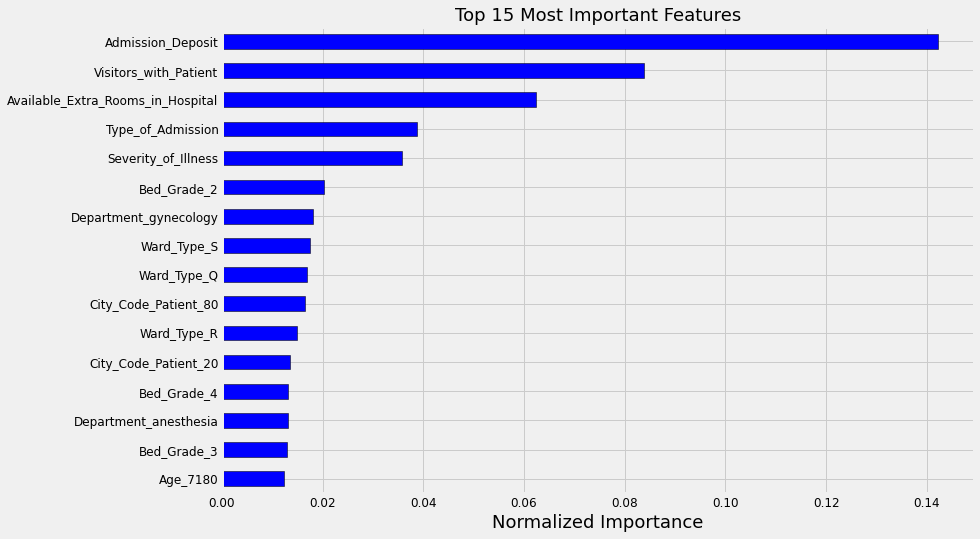

In [115]:
norm_fi = plot_feature_importances(fi, n=15) 
norm_fi.head(15)

# Conclusion

It would have been more useful if there was more information in the data provided. Also a clearer decription of certain feature would have become handy in understanding the data more and maybe even create new features from it. In the model building phase SMOTE techniques haven't been shown as here as it resulted in poor performances.

I have also done the models having all 11 target classes and have got an accuracy of 44%(Even though accuracy isn't my main criteria). I had also done for 5 classes considering 0-10 days as minimal stay and got an accuracy of 65% and I settled for 4 classes as the above models show, where accuracy was 73%. The way you label the target variable will depend on the buisness reqirements and the domain expert inputs.  

With this we have finished our project. An in-depth EDA and Feature Engineering has been presented here. Also a lot of iteration through different models and also hypertuning of those models is done. Our model has achieved a decent ROC AUC score indicating that our errors are minimal which bodes well for real time applications. Thank you.

___